In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset (example using a CSV file)
df = pd.read_csv('movies.csv')  # Make sure this contains columns for title and other features

# Preprocessing
df['description'] = df['description'].fillna('')  # Fill NaN descriptions
df['features'] = df['genres'] + ' ' + df['description']  # Combine features

# Feature Extraction
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['features'])

# Calculate Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to recommend movies
def recommend_movie(title, cosine_sim=cosine_sim):
    idx = df.index[df['title'] == title].tolist()[0]  # Get index of the movie
    sim_scores = list(enumerate(cosine_sim[idx]))  # Get similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Sort by similarity
    sim_scores = sim_scores[1:6]  # Get top 5 similar movies
    movie_indices = [i[0] for i in sim_scores]  # Get the indices
    return df['title'].iloc[movie_indices]  # Return movie titles

# Example usage
print(recommend_movie('The Matrix'))


In [35]:
import pandas as pd

# Sample DataFrame with poster paths and movie names
data = {
    'poster_path': [
        '/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg',
        '/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg',
        '/1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg',
        '/4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg',
        '/lf9RTErt8BSLQy98aSFblElvsCQ.jpg',
        '/jcP3HFXF1BIW9LmBrDusbbDZjBG.jpg'
    ],
    'movie_name': [
        'Movie 1',
        'Movie 2',
        'Movie 3',
        'Movie 4',
        'Movie 5',
        'Movie 6'
    ]
}

df = pd.DataFrame(data)

# Adding a new column with the image HTML
df['poster_path'] = "<img src='https://image.tmdb.org/t/p/w185/" + df['poster_path'] + "' style='height:100px;'/>"

# Display the DataFrame
df

,poster_path,movie_name
0,<img src='https://image.tmdb.org/t/p/w185//uXD...,Movie 1
1,<img src='https://image.tmdb.org/t/p/w185//vgp...,Movie 2
2,<img src='https://image.tmdb.org/t/p/w185//1FS...,Movie 3
3,<img src='https://image.tmdb.org/t/p/w185//4wj...,Movie 4
4,<img src='https://image.tmdb.org/t/p/w185//lf9...,Movie 5
5,<img src='https://image.tmdb.org/t/p/w185//jcP...,Movie 6


In [37]:
# df = pd.DataFrame(data)

In [38]:
df

,poster_path,movie_name
0,<img src='https://image.tmdb.org/t/p/w185//uXD...,Movie 1
1,<img src='https://image.tmdb.org/t/p/w185//vgp...,Movie 2
2,<img src='https://image.tmdb.org/t/p/w185//1FS...,Movie 3
3,<img src='https://image.tmdb.org/t/p/w185//4wj...,Movie 4
4,<img src='https://image.tmdb.org/t/p/w185//lf9...,Movie 5
5,<img src='https://image.tmdb.org/t/p/w185//jcP...,Movie 6


In [39]:
# def add_image_data(movie_data):
#     def get_image_url(poster_path, size='w185'):
#         base_url = 'https://image.tmdb.org/t/p/'
#         return f"{base_url}{size}{poster_path}"
#     movie_data['image_url'] = movie_data['poster_path'].apply(get_image_url)
#     movie_data['image_html'] = movie_data['image_url'].apply(lambda url: f"<img src='{url}' style='height:100px;'/>")
#     return movie_data

In [40]:
# df = add_image_data(df)

In [41]:
df.head()

,poster_path,movie_name
0,<img src='https://image.tmdb.org/t/p/w185//uXD...,Movie 1
1,<img src='https://image.tmdb.org/t/p/w185//vgp...,Movie 2
2,<img src='https://image.tmdb.org/t/p/w185//1FS...,Movie 3
3,<img src='https://image.tmdb.org/t/p/w185//4wj...,Movie 4
4,<img src='https://image.tmdb.org/t/p/w185//lf9...,Movie 5


In [42]:
df.set_index('movie_name', inplace=True)

In [43]:
df

,poster_path
movie_name,
Movie 1,<img src='https://image.tmdb.org/t/p/w185//uXD...
Movie 2,<img src='https://image.tmdb.org/t/p/w185//vgp...
Movie 3,<img src='https://image.tmdb.org/t/p/w185//1FS...
Movie 4,<img src='https://image.tmdb.org/t/p/w185//4wj...
Movie 5,<img src='https://image.tmdb.org/t/p/w185//lf9...
Movie 6,<img src='https://image.tmdb.org/t/p/w185//jcP...


In [45]:
df['poster_path'][0]

"<img src='https://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'/>"

In [46]:
df.to_html(escape=False)

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>poster_path</th>\n    </tr>\n    <tr>\n      <th>movie_name</th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Movie 1</th>\n      <td><img src=\'https://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg\' style=\'height:100px;\'/></td>\n    </tr>\n    <tr>\n      <th>Movie 2</th>\n      <td><img src=\'https://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg\' style=\'height:100px;\'/></td>\n    </tr>\n    <tr>\n      <th>Movie 3</th>\n      <td><img src=\'https://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg\' style=\'height:100px;\'/></td>\n    </tr>\n    <tr>\n      <th>Movie 4</th>\n      <td><img src=\'https://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg\' style=\'height:100px;\'/></td>\n    </tr>\n    <tr>\n      <th>Movie 5</th>\n      <td><img src=\'https://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFbl

In [47]:
from IPython.display import HTML  


In [48]:
HTML(df.to_html(escape=False))

,poster_path
movie_name,
Movie 1,
Movie 2,
Movie 3,
Movie 4,
Movie 5,
Movie 6,


In [30]:
data = {
    'poster_path': [
        'rhIRbceoE9lR4veEXuwCC2wARtG.jpg',
        'jcP3HFXF1BIW9LmBrDusbbDZjBG.jpg',
        'yWp7PgydSlxlhl7benKhTnCvRjN.jpg',
        'q1lrN6ZrIsOs077lQB86aPGKZRF.jpg',
        'q2XVemXiWSa18mbaVpI3rbLXG2u.jpg',
        'uv7syi4vRyjvWoB8qExbqnbuCu5.jpg'
    ]
}

df = pd.DataFrame(data)

# Adding a new column with the image HTML
df['image_html'] = "<img src='https://image.tmdb.org/t/p/w185/" + df['poster_path'] + "' style='height:100px;'/>"

# Display the DataFrame
print(df)

                       poster_path  \
0  rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
1  jcP3HFXF1BIW9LmBrDusbbDZjBG.jpg   
2  yWp7PgydSlxlhl7benKhTnCvRjN.jpg   
3  q1lrN6ZrIsOs077lQB86aPGKZRF.jpg   
4  q2XVemXiWSa18mbaVpI3rbLXG2u.jpg   
5  uv7syi4vRyjvWoB8qExbqnbuCu5.jpg   

                                          image_html  
0  <img src='https://image.tmdb.org/t/p/w185/rhIR...  
1  <img src='https://image.tmdb.org/t/p/w185/jcP3...  
2  <img src='https://image.tmdb.org/t/p/w185/yWp7...  
3  <img src='https://image.tmdb.org/t/p/w185/q1lr...  
4  <img src='https://image.tmdb.org/t/p/w185/q2XV...  
5  <img src='https://image.tmdb.org/t/p/w185/uv7s...  


In [4]:
import pandas as pd

# Sample data
data = {
    'budget': [30000000],
    'genres': ['Animation Comedy Family'],
    'id': [862],
    'overview': ["Led by Woody, Andy's toys live happily in his ..."],
    'popularity': [21],
    'poster_path': ["<img src='https://image.tmdb.org/t/p/w185//rhI..."],
    'production_companies': ['Pixar Animation Studios'],
    'revenue': [373554033.00],
    'runtime': [81.00],
    'spoken_languages': ['English'],
    'title': ['Toy Story'],
    'vote_average': [7.70],
    'vote_count': [5415.00],
    'cast': ['Tom Hanks, Tim Allen, Don Rickles'],
    'crew': ['John Lasseter'],
    'keywords': ['jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife'],
    'rating': [3.00]
}

# Create DataFrame
df = pd.DataFrame(data)

# Split the 'genres' column into a list
df['genres'] = df['genres'].str.split(' ')

df

# Explode the 'genres' column to create new rows
df_exploded = df.explode('genres')

# Display the updated DataFrame
df_exploded

,budget,genres,id,overview,popularity,poster_path,production_companies,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,keywords,rating
0,30000000,"[Animation, Comedy, Family]",862,"Led by Woody, Andy's toys live happily in his ...",21,<img src='https://image.tmdb.org/t/p/w185//rhI...,Pixar Animation Studios,373554033.0,81.0,English,Toy Story,7.7,5415.0,"Tom Hanks, Tim Allen, Don Rickles",John Lasseter,jealousy toy boy friendship friends rivalry bo...,3.0


In [24]:
import numpy as np, pandas as pd
import ast

In [81]:
credits_df = pd.read_csv('DataSets/credits.csv')
keywords_df = pd.read_csv('DataSets/keywords.csv')
links_df = pd.read_csv('DataSets/links.csv')
links_small_df = pd.read_csv('DataSets/links_small.csv')
movies_metadata_df = pd.read_csv('DataSets/movies_metadata.csv')
ratings_df = pd.read_csv('DataSets/ratings.csv')
ratings_small_df = pd.read_csv('DataSets/ratings_small.csv')

In [53]:
cast_df = pd.DataFrame(cast_df)
cast_df

,cast_id,character,credit_id,gender,id,name,order,profile_path
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg
1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg
2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg
3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg
4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg
...,...,...,...,...,...,...,...,...
562469,2,,52fe4ea59251416c7515d7d5,2,544742,Iwan Mosschuchin,0,None
562470,3,,52fe4ea59251416c7515d7d9,1,1090923,Nathalie Lissenko,1,None
562471,4,,52fe4ea59251416c7515d7dd,2,1136422,Pavel Pavlov,2,None
562472,5,,52fe4ea59251416c7515d7e1,0,1261758,Aleksandr Chabrov,3,None


In [54]:
credits_df['crew'] = credits_df['crew'].apply(ast.literal_eval)

In [55]:
crew_df = []

for num in range(0, len(credits_df)) :
    for col in credits_df['crew'][num]:
        crew_df.append(col)

In [56]:
crew_df = pd.DataFrame(crew_df)
crew_df

,credit_id,department,gender,id,job,name,profile_path
0,52fe4284c3a36847f8024f49,Directing,2,7879,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg
1,52fe4284c3a36847f8024f4f,Writing,2,12891,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg
2,52fe4284c3a36847f8024f55,Writing,2,7,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg
3,52fe4284c3a36847f8024f5b,Writing,2,12892,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg
4,52fe4284c3a36847f8024f61,Writing,0,12893,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg
...,...,...,...,...,...,...,...
464309,52fe4776c3a368484e0c8399,Sound,0,549356,Original Music Composer,Richard McHugh,None
464310,52fe4776c3a368484e0c839f,Camera,2,58818,Director of Photography,João Fernandes,None
464311,533bccebc3a36844cf0011a7,Directing,0,1085341,Director,Yakov Protazanov,/yyjbGdCs2ZN6IlZNCfmBWyuRDlt.jpg
464312,58ebbc26925141281908aa0a,Production,2,1195656,Producer,Joseph N. Ermolieff,None


In [ ]:
keywords_df.head()

In [58]:
keywords_df['keywords'] = keywords_df['keywords'].apply(ast.literal_eval)

In [59]:
key_df = []

for num in range(0, len(keywords_df)) :
    for col in keywords_df['keywords'][num]:
        key_df.append(col)

In [60]:
key_df = pd.DataFrame(key_df)
key_df

,id,name
0,931,jealousy
1,4290,toy
2,5202,boy
3,6054,friendship
4,9713,friends
...,...,...
158675,11800,mockumentary
158676,10703,tragic love
158677,2679,artist
158678,14531,play


In [61]:
links_df = pd.read_csv('DataSets/links.csv')
links_small_df = pd.read_csv('DataSets/links_small.csv')

In [62]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [63]:
ratings_df = pd.read_csv('DataSets/ratings.csv')
ratings_small_df = pd.read_csv('DataSets/ratings_small.csv')

In [64]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [75]:
temp = pd.merge(links_df, ratings_df, on = 'movieId')

In [76]:
temp.head(2)

,movieId,imdbId,tmdbId,userId,rating,timestamp
0,1,114709,862.0,8,4.0,1013443596
1,1,114709,862.0,9,4.5,1073837180


In [65]:
movies_metadata_df = pd.read_csv('DataSets/movies_metadata.csv')

C:\Users\Legend\AppData\Local\Temp\ipykernel_11944\3653762947.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata_df = pd.read_csv('DataSets/movies_metadata.csv')


In [78]:
# movies_metadata_df = pd.merge(temp, movies_metadata_df, on = 'imdbId')

In [73]:
movies_metadata_df.iloc[:, 0: 13].head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."


In [74]:
movies_metadata_df.iloc[:, 13: 24].head(2)

,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


##### Important all required Libraries as per use: 

In [24]:
import numpy as np, pandas as pd
import seaborn as sns, plotly.express as px
import matplotlib.pyplot as plt
import ast

import warnings
warnings.filterwarnings('ignore')

    Reading the DataSet as per use.

In [25]:
movies_df = pd.read_csv('DataSets/movies_metadata.csv')
movies_df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [26]:
def null_counter(data) :
    count = data.isnull().sum()
    percen = count / len(data) * 100

    count.sort_values(ascending = False)
    percen.sort_values(ascending = False)

    df_null = pd.DataFrame({
        'column name' : data.columns,
        'total count' : count,
        'percentage' : percen
    })

    df_null.reset_index(drop = True, inplace = True)
    df_null_sorted = df_null.sort_values(by='percentage', ascending=False)
    df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
    return df_filtered

In [27]:
null_counter(movies_df)

,column name,total count,percentage
1,belongs_to_collection,40972,90.115691
4,homepage,37684,82.883913
19,tagline,25054,55.104914
9,overview,954,2.098271
11,poster_path,386,0.848986
16,runtime,263,0.578454
18,status,87,0.191352
14,release_date,87,0.191352
6,imdb_id,17,0.037391
7,original_language,11,0.024194


    Dropping the Columns more than 40% as they aren't USeful at all ;

In [28]:
movies_df.drop(['belongs_to_collection', 'homepage', 'tagline'], axis = 1, inplace = True)

    Imputing the values for other columns but lets first the column information 

In [29]:
movies_df.shape

(45466, 21)

In [30]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  object 
 1   budget                45466 non-null  object 
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   imdb_id               45449 non-null  object 
 5   original_language     45455 non-null  object 
 6   original_title        45466 non-null  object 
 7   overview              44512 non-null  object 
 8   popularity            45461 non-null  object 
 9   poster_path           45080 non-null  object 
 10  production_companies  45463 non-null  object 
 11  production_countries  45463 non-null  object 
 12  release_date          45379 non-null  object 
 13  revenue               45460 non-null  float64
 14  runtime               45203 non-null  float64
 15  spoken_languages   

In [31]:
movies_df['overview'].describe()

count                  44512
unique                 44307
top       No overview found.
freq                     133
Name: overview, dtype: object

In [32]:
movies_df['overview'].value_counts().head()

overview
No overview found.                                            133
No Overview                                                     7
                                                                5
No movie overview available.                                    3
A few funny little novels about different aspects of life.      3
Name: count, dtype: int64

In [33]:
movies_df['overview'].fillna('No overview found', inplace = True)

     We'll the given overview column doesn't have some imporatnt to outr task and nothing to replace so 
     decided to impute by '' No overview found '' so imputed it 

In [34]:
movies_df['poster_path'].head()

0    /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1    /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2    /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3    /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4    /e64sOI48hQXyru7naBFyssKFxVd.jpg
Name: poster_path, dtype: object

In [35]:
movies_df['runtime'].median()

95.0

In [36]:
movies_df['runtime'].fillna(movies_df['runtime'].median(), inplace = True)

In [37]:
movies_df['status'].value_counts()

status
Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

In [38]:
movies_df['status'].fillna(movies_df['status'].mode()[0], inplace = True)

In [39]:
movies_df['release_date'].value_counts().head()

release_date
2008-01-01    136
2009-01-01    121
2007-01-01    118
2005-01-01    111
2006-01-01    101
Name: count, dtype: int64

In [40]:
movies_df['release_date'].fillna(movies_df['release_date'].mode()[0], inplace = True)

In [41]:
movies_df['original_language'].mode()[0]

'en'

In [42]:
movies_df['original_language'].fillna(movies_df['original_language'].mode()[0], inplace = True)

In [43]:
movies_df['vote_count'].fillna(movies_df['vote_count'].median(), inplace = True)
movies_df['vote_average'].fillna(movies_df['vote_average'].median(), inplace = True)
movies_df['revenue'].fillna(movies_df['revenue'].median(), inplace = True)
movies_df['poster_path'].fillna(movies_df['poster_path'].mode()[0], inplace = True)
movies_df['imdb_id'].fillna(movies_df['imdb_id'].mode()[0], inplace = True)
movies_df['video'].fillna(movies_df['video'].mode()[0], inplace = True)
movies_df['title'].fillna(movies_df['title'].mode()[0], inplace = True)
movies_df['spoken_languages'].fillna(movies_df['spoken_languages'].mode()[0], inplace = True)
movies_df['popularity'].fillna(movies_df['popularity'].mode()[0], inplace = True)
movies_df['production_countries'].fillna(movies_df['production_countries'].mode()[0], inplace = True)
movies_df['production_companies'].fillna(movies_df['production_companies'].mode()[0], inplace = True)

In [44]:
null_counter(movies_df)

,column name,total count,percentage


    Well the Null values are solved.
        Changing some columns as per our need

In [45]:
movies_df['genres']

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45466, dtype: object

In [46]:
movies_df['genres'] = movies_df['genres'].apply(ast.literal_eval)

genre_df = []

for num in range(0, len(movies_df)) :
    for col in movies_df['genres'][num]:
        genre_df.append(col)

genre_df = pd.DataFrame(genre_df)
genre_df

,id,name
0,16,Animation
1,35,Comedy
2,10751,Family
3,12,Adventure
4,14,Fantasy
...,...,...
91101,10751,Family
91102,18,Drama
91103,28,Action
91104,18,Drama


In [47]:
movies_df['production_companies']

0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45461                                                   []
45462               [{'name': 'Sine Olivia', 'id': 19653}]
45463    [{'name': 'American World Pictures', 'id': 6165}]
45464                 [{'name': 'Yermoliev', 'id': 88753}]
45465                                                   []
Name: production_companies, Length: 45466, dtype: object

In [48]:
movies_df['production_companies'] = movies_df['production_companies'].apply(ast.literal_eval)

com_df = []

for num in range(0, len(movies_df)) :
    for col in movies_df['production_companies'][num]:
        com_df.append(col)

com_df = pd.DataFrame(com_df)
com_df

TypeError: 'bool' object is not iterable

In [49]:
movies_df['production_countries']

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45466, dtype: object

In [ ]:
movies_df['genres'] = movies_df['genres'].apply(ast.literal_eval)

genre_df = []

for num in range(0, len(movies_df)) :
    for col in movies_df['genres'][num]:
        genre_df.append(col)

genre_df = pd.DataFrame(genre_df)
genre_df

    Spoken language isn't so much important.

In [ ]:
movies_df.drop(['spoken_languages', 'genres', 'production_companies', 'production_countries'], axis = 1, inplace = True)

In [ ]:
print(len(genre_df))
print(len(pro_coun_df))
print(len(pro_com_df))
print(len(movies_df))

In [ ]:
movies_df.head(2)

In [ ]:
movies_df['id'].value_counts()

In [ ]:
movies_df['id'] = pd.to_numeric(movies_df['id'], errors='coerce')
movies_df['id'].fillna(movies_df['id'].median(), inplace = True)
movies_df['id'] = movies_df['id'].astype(int)

In [ ]:
# temp = pd.merge(movies_df, genre_df, on = 'id')

In [ ]:
temp = pd.merge(movies_df, genre_df, on='id')
temp

In [ ]:
temp = pd.merge(movies_df, genre_df, on='id')

exact_matches_count = temp.shape[0]

print(exact_matches_count)

In [50]:
movies_df

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,...,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",2008-01-01,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,False,4.0,1.0
45462,False,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,False,9.0,3.0
45463,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,False,3.8,6.0
45464,False,0,[],227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,False,0.0,0.0


In [53]:
movies_df.iloc[0,9]

'/rhIRbceoE9lR4veEXuwCC2wARtG.jpg'

In [55]:
### Creating subset of dataset for Movie Posters

subset = movies_df.iloc[:5, :2]

subset.to_html(escape=False)

#### Convert into HTML page

HTML(subset.to_html(escape=False))

NameError: name 'HTML' is not defined

In [114]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import ast

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', '{:.2f}'.format)

In [115]:
cred_df = pd.read_csv('DataSets/credits.csv')

In [116]:
cred_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [117]:
cred_df['crew'] = cred_df['crew'].apply(ast.literal_eval)
cred_df['cast'] = cred_df['cast'].apply(ast.literal_eval)

In [118]:
cred_df.shape

(45476, 3)

In [119]:
crew_df = []

for index in range(len(cred_df)):
    crew_members = cred_df['crew'][index]
    main_id = cred_df['id'][index]
    for member in crew_members:
        member['main_id'] = main_id
        crew_df.append(member)             
        
cast_df = []

for index in range(len(cred_df)):
    cast_members = cred_df['cast'][index]
    main_id = cred_df['id'][index]
    for member in cast_members:
        member['main_id'] = main_id
        cast_df.append(member) 

In [120]:
crew_df = pd.DataFrame(crew_df)
cast_df = pd.DataFrame(cast_df)

In [121]:
crew_df['cast_id'] = crew_df['id']
crew_df.drop('id', axis = 1, inplace = True)
crew_df.head()

,credit_id,department,gender,job,name,profile_path,main_id,cast_id
0,52fe4284c3a36847f8024f49,Directing,2,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg,862,7879
1,52fe4284c3a36847f8024f4f,Writing,2,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg,862,12891
2,52fe4284c3a36847f8024f55,Writing,2,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg,862,7
3,52fe4284c3a36847f8024f5b,Writing,2,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg,862,12892
4,52fe4284c3a36847f8024f61,Writing,0,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg,862,12893


In [122]:
cast_df['id_cast'] = cast_df['id']
cast_df.drop('id', axis = 1, inplace = True)
cast_df.head()

,cast_id,character,credit_id,gender,name,order,profile_path,main_id,id_cast
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862,31
1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,862,12898
2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,862,7167
3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,862,12899
4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,862,12900


In [123]:
crew_df.shape

(464314, 8)

In [124]:
cast_df.shape

(562474, 9)

In [ ]:
merger = pd.merge(crew_df, cast_df, on = "id")
merger.shape

In [150]:
cast_df[cast_df['id_cast'] == 1]

,cast_id,character,credit_id,gender,name,order,profile_path,main_id,id_cast
6891,5,Disappointed Man,52fe4235c3a36847f800c2f7,2,George Lucas,21,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,306,1
35385,88,Missionary (uncredited),5895b352c3a36822e0004ad5,2,George Lucas,66,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,87,1
58608,51,Man Kissing on Bridge (uncredited),5781e003c3a3681f4d000f21,2,George Lucas,27,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,879,1
146919,28,Himself,52fe43cac3a36847f806fc33,2,George Lucas,3,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,4539,1
161631,78,Baron Papanoida,584a4128c3a368141f01b620,2,George Lucas,24,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,1895,1
...,...,...,...,...,...,...,...,...,...
393374,66,Himself,52fe45809251416c75058c67,2,George Lucas,58,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,13611,1
393465,4,Himself,54e8988f925141117c001608,2,George Lucas,3,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,326591,1
414571,15,Himself,56845460c3a3686075017c7d,2,George Lucas,14,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,298664,1
421787,19,Himself (voice),52fe4624c3a36847f80ef089,2,George Lucas,9,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,42979,1


In [149]:
crew_df[crew_df['cast_id'] == 1]

,credit_id,department,gender,job,name,profile_path,main_id,cast_id
4495,52fe420dc3a36847f8000437,Directing,2,Director,George Lucas,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,11,1
4496,52fe420dc3a36847f800045b,Production,2,Executive Producer,George Lucas,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,11,1
4497,562e75309251414006009955,Writing,2,Writer,George Lucas,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,11,1
8425,52fe4447c3a368484e019f85,Writing,2,Story,George Lucas,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,22588,1
17831,566e19f292514169e200d46f,Editing,2,Editor,George Lucas,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,1891,1
...,...,...,...,...,...,...,...,...
305679,52fe4aa49251416c750e92b7,Writing,2,Writer,George Lucas,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,140979,1
322501,5653a0509251417013001115,Writing,2,Characters,George Lucas,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,140607,1
331327,54625560c3a3680820000186,Production,2,Executive Producer,George Lucas,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,302429,1
331328,57dae868925141456e001610,Writing,2,Story,George Lucas,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,302429,1


    cast_df and crew_df are the two datasets we got.

In [12]:
cred_df = pd.merge(cast_df, crew_df, on = 'main_id')
cred_df.head()

,cast_id_x,character,credit_id_x,gender_x,name_x,order,profile_path_x,main_id,id_cast,credit_id_y,department,gender_y,job,name_y,profile_path_y,cast_id_y
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862,31,52fe4284c3a36847f8024f49,Directing,2,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg,7879
1,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862,31,52fe4284c3a36847f8024f4f,Writing,2,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg,12891
2,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862,31,52fe4284c3a36847f8024f55,Writing,2,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg,7
3,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862,31,52fe4284c3a36847f8024f5b,Writing,2,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg,12892
4,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862,31,52fe4284c3a36847f8024f61,Writing,0,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg,12893


In [13]:
cred_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
9488022    False
9488023    False
9488024    False
9488025    False
9488026    False
Length: 9488027, dtype: bool

In [14]:
cred_df.shape

(9488027, 16)

In [470]:
keywords_df = pd.read_csv('DataSets/keywords.csv')

In [471]:
keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [472]:
keywords_df['keywords'] = keywords_df['keywords'].apply(ast.literal_eval)

In [473]:
keywords_df['keywords'] 

0        [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1        [{'id': 10090, 'name': 'board game'}, {'id': 1...
2        [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3        [{'id': 818, 'name': 'based on novel'}, {'id':...
4        [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...
                               ...                        
46414               [{'id': 10703, 'name': 'tragic love'}]
46415    [{'id': 2679, 'name': 'artist'}, {'id': 14531,...
46416                                                   []
46417                                                   []
46418                                                   []
Name: keywords, Length: 46419, dtype: object

In [474]:
key_df = []

for index in range(len(keywords_df)) :
    key_memebers = keywords_df['keywords'][index]
    main_id = keywords_df['id'][index]
    
    for member in key_memebers :
        member['main_id'] = main_id
        key_df.append(member)

In [475]:
key_df = pd.DataFrame(key_df)
key_df.head()

,id,name,main_id
0,931,jealousy,862
1,4290,toy,862
2,5202,boy,862
3,6054,friendship,862
4,9713,friends,862


    From keywords also we had fetched all data!

In [476]:
# cred_df = pd.merge(cred_df, key_df, on = 'main_id')
# cred_df.head()

In [477]:
links_df = pd.read_csv('DataSets/links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.00
1,2,113497,8844.00
2,3,113228,15602.00
3,4,114885,31357.00
4,5,113041,11862.00


In [478]:
ratings_df = pd.read_csv('DataSets/ratings_small.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.50,1260759144
1,1,1029,3.00,1260759179
2,1,1061,3.00,1260759182
3,1,1129,2.00,1260759185
4,1,1172,4.00,1260759205


In [479]:
temp = pd.merge(links_df, ratings_df, on = 'movieId')
temp.head()

,movieId,imdbId,tmdbId,userId,rating,timestamp
0,1,114709,862.00,7,3.00,851866703
1,1,114709,862.00,9,4.00,938629179
2,1,114709,862.00,13,5.00,1331380058
3,1,114709,862.00,15,2.00,997938310
4,1,114709,862.00,19,3.00,855190091


In [480]:
cred_df.head(1)

,cast_id_x,character,credit_id_x,gender_x,name_x,order,profile_path_x,main_id,id_cast,credit_id_y,department,gender_y,job,name_y,profile_path_y,cast_id_y
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862,31,52fe4284c3a36847f8024f49,Directing,2,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg,7879


In [481]:
temp.head(1)

,movieId,imdbId,tmdbId,userId,rating,timestamp
0,1,114709,862.00,7,3.00,851866703


In [482]:
key_df.head(1)

,id,name,main_id
0,931,jealousy,862


##### As the movies main dataset is most important for us so working on that first.

In [483]:
movies_df = pd.read_csv('DataSets/movies_metadata.csv')

In [484]:
movies_df.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,5415.00


In [485]:
def null_counter(data) :
    count = data.isnull().sum()
    percen = count / len(data) * 100

    count.sort_values(ascending = False)
    percen.sort_values(ascending = False)

    df_null = pd.DataFrame({
        'column name' : data.columns,
        'total count' : count,
        'percentage' : percen
    })

    df_null.reset_index(drop = True, inplace = True)
    df_null_sorted = df_null.sort_values(by='percentage', ascending=False)
    df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
    return df_filtered

In [486]:
null_counter(movies_df)

,column name,total count,percentage
1,belongs_to_collection,40972,90.12
4,homepage,37684,82.88
19,tagline,25054,55.10
9,overview,954,2.10
11,poster_path,386,0.85
...,...,...,...
15,revenue,6,0.01
23,vote_count,6,0.01
10,popularity,5,0.01
12,production_companies,3,0.01


    Dropping the Columns more than 40% as they aren't USeful at all ;

In [487]:
movies_df.drop(['belongs_to_collection', 'homepage', 'tagline'], axis = 1, inplace = True)

    Imputing the values for other columns but lets first the column information 

In [488]:
movies_df.shape

(45466, 21)

In [489]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  object 
 1   budget                45466 non-null  object 
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   imdb_id               45449 non-null  object 
 5   original_language     45455 non-null  object 
 6   original_title        45466 non-null  object 
 7   overview              44512 non-null  object 
 8   popularity            45461 non-null  object 
 9   poster_path           45080 non-null  object 
 10  production_companies  45463 non-null  object 
 11  production_countries  45463 non-null  object 
 12  release_date          45379 non-null  object 
 13  revenue               45460 non-null  float64
 14  runtime               45203 non-null  float64
 15  spoken_languages   

In [490]:
movies_df['overview'].describe()

count                  44512
unique                 44307
top       No overview found.
freq                     133
Name: overview, dtype: object

In [491]:
movies_df['overview'].value_counts().head()

overview
No overview found.                                            133
No Overview                                                     7
                                                                5
No movie overview available.                                    3
A few funny little novels about different aspects of life.      3
Name: count, dtype: int64

In [492]:
movies_df['overview'].fillna('No overview found', inplace = True)

     We'll the given overview column doesn't have some imporatnt to outr task and nothing to replace so 
     decided to impute by '' No overview found '' so imputed it 

In [493]:
movies_df['poster_path'].head()

0    /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1    /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2    /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3    /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4    /e64sOI48hQXyru7naBFyssKFxVd.jpg
Name: poster_path, dtype: object

In [494]:
movies_df['runtime'].median()

95.0

In [495]:
movies_df['runtime'].fillna(movies_df['runtime'].median(), inplace = True)

In [496]:
movies_df['status'].value_counts()

status
Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

In [497]:
movies_df['status'].fillna(movies_df['status'].mode()[0], inplace = True)

In [498]:
movies_df['release_date'].value_counts().head()

release_date
2008-01-01    136
2009-01-01    121
2007-01-01    118
2005-01-01    111
2006-01-01    101
Name: count, dtype: int64

In [499]:
movies_df['release_date'].fillna(movies_df['release_date'].mode()[0], inplace = True)

In [500]:
movies_df['original_language'].mode()[0]

'en'

In [501]:
movies_df['original_language'].fillna(movies_df['original_language'].mode()[0], inplace = True)

In [502]:
movies_df['vote_count'].fillna(movies_df['vote_count'].median(), inplace = True)
movies_df['vote_average'].fillna(movies_df['vote_average'].median(), inplace = True)
movies_df['revenue'].fillna(movies_df['revenue'].median(), inplace = True)
movies_df['poster_path'].fillna(movies_df['poster_path'].mode()[0], inplace = True)
movies_df['imdb_id'].fillna(movies_df['imdb_id'].mode()[0], inplace = True)
movies_df['video'].fillna(movies_df['video'].mode()[0], inplace = True)
movies_df['title'].fillna(movies_df['title'].mode()[0], inplace = True)
movies_df['spoken_languages'].fillna(movies_df['spoken_languages'].mode()[0], inplace = True)
movies_df['popularity'].fillna(movies_df['popularity'].mode()[0], inplace = True)
movies_df['production_countries'].fillna(movies_df['production_countries'].mode()[0], inplace = True)
movies_df['production_companies'].fillna(movies_df['production_companies'].mode()[0], inplace = True)

In [503]:
null_counter(movies_df)

,column name,total count,percentage


    Well the Null values are solved.
        Changing some columns as per our need

In [504]:
movies_df.head(1)

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.70,5415.00


In [505]:
print("genres : ", movies_df['genres'][0])
print("production_companies : ", movies_df['production_companies'][0])
print("production_countries : ", movies_df['production_countries'][0])
print("spoken_languages : ", movies_df['spoken_languages'][0])

genres :  [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
production_companies :  [{'name': 'Pixar Animation Studios', 'id': 3}]
production_countries :  [{'iso_3166_1': 'US', 'name': 'United States of America'}]
spoken_languages :  [{'iso_639_1': 'en', 'name': 'English'}]


In [506]:
movies_df['genres'] = movies_df['genres'].apply(ast.literal_eval)
movies_df['production_companies'] = movies_df['production_companies'].apply(ast.literal_eval)
movies_df['production_countries'] = movies_df['production_countries'].apply(ast.literal_eval)
movies_df['spoken_languages'] = movies_df['spoken_languages'].apply(ast.literal_eval)

In [507]:
genres_df = []

for index in range(len(movies_df)):
    genres_members = movies_df['genres'][index]
    main_id = movies_df['id'][index]
    for member in genres_members:
        member['main_id'] = main_id
        genres_df.append(member)

In [508]:
genres_df = pd.DataFrame(genres_df)
genres_df.head(4)

,id,name,main_id
0,16,Animation,862
1,35,Comedy,862
2,10751,Family,862
3,12,Adventure,8844


In [509]:
movies_df['production_companies']

0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45461                                                   []
45462               [{'name': 'Sine Olivia', 'id': 19653}]
45463    [{'name': 'American World Pictures', 'id': 6165}]
45464                 [{'name': 'Yermoliev', 'id': 88753}]
45465                                                   []
Name: production_companies, Length: 45466, dtype: object

In [510]:
production_companies_df = []

for index in range(len(movies_df)):
    production_companies_members = movies_df['production_companies'].iloc[index]
    main_id = movies_df['id'].iloc[index]

    if isinstance(production_companies_members, list):
        for member in production_companies_members:
            member['main_id'] = main_id
            production_companies_df.append(member)

In [511]:
production_companies_df = pd.DataFrame(production_companies_df)
production_companies_df.head()

,name,id,main_id
0,Pixar Animation Studios,3,862
1,TriStar Pictures,559,8844
2,Teitler Film,2550,8844
3,Interscope Communications,10201,8844
4,Warner Bros.,6194,15602


In [512]:
production_companies_df['company_name'] = production_companies_df['name']
production_companies_df.drop('name', axis = 1, inplace = True)
production_companies_df.head()

,id,main_id,company_name
0,3,862,Pixar Animation Studios
1,559,8844,TriStar Pictures
2,2550,8844,Teitler Film
3,10201,8844,Interscope Communications
4,6194,15602,Warner Bros.


In [513]:
production_countries_df = []

for index in range(len(movies_df)):
    production_countries_members = movies_df['production_countries'].iloc[index]
    main_id = movies_df['id'].iloc[index]

    if isinstance(production_countries_members, list):
        for member in production_countries_members:
            member['main_id'] = main_id
            production_countries_df.append(member)           

In [514]:
production_countries_df = pd.DataFrame(production_countries_df)
production_countries_df

,iso_3166_1,name,main_id
0,US,United States of America,862
1,US,United States of America,8844
2,US,United States of America,15602
3,US,United States of America,31357
4,US,United States of America,11862
...,...,...,...
49421,IR,Iran,439050
49422,PH,Philippines,111109
49423,US,United States of America,67758
49424,RU,Russia,227506


In [515]:
production_countries_df['coun_name'] = production_countries_df['name']
production_countries_df.drop('name', axis = 1, inplace = True)
production_countries_df.head()

,iso_3166_1,main_id,coun_name
0,US,862,United States of America
1,US,8844,United States of America
2,US,15602,United States of America
3,US,31357,United States of America
4,US,11862,United States of America


In [516]:
spoken_languages_df = []

for index in range(len(movies_df)):
    spoken_languages_members = movies_df['spoken_languages'][index]
    main_id = movies_df['id'][index]
    for member in spoken_languages_members:
        member['main_id'] = main_id
        spoken_languages_df.append(member) 

In [517]:
spoken_languages_df = pd.DataFrame(spoken_languages_df)
spoken_languages_df.head()

,iso_639_1,name,main_id
0,en,English,862
1,en,English,8844
2,fr,Français,8844
3,en,English,15602
4,en,English,31357


In [ ]:
spoken_languages_df['spoken_name'] = spoken_languages_df['name']
spoken_languages_df.drop('name', axis = 1, inplace = True)
spoken_languages_df.head()

In [361]:
movies_df.drop(['spoken_languages', 'genres', 'production_companies', 'production_countries'], axis = 1, inplace = True)

In [518]:
genres_df
spoken_languages_df
production_companies_df
production_countries_df

,iso_3166_1,main_id,coun_name
0,US,862,United States of America
1,US,8844,United States of America
2,US,15602,United States of America
3,US,31357,United States of America
4,US,11862,United States of America
...,...,...,...
49421,IR,439050,Iran
49422,PH,111109,Philippines
49423,US,67758,United States of America
49424,RU,227506,Russia


In [519]:
movies_df['id'] = pd.to_numeric(movies_df['id'], errors='coerce')
# movies_df['id'] = movies_df['id'].astype(int)

In [520]:
movies_df.head(1)

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation', 'main_id': '8...",862.00,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English', 'main_...",Released,Toy Story,False,7.70,5415.00


In [521]:
genres_df.head(1)

,id,name,main_id
0,16,Animation,862


In [522]:
movies_df['id'].isnull().sum()
movies_df['id'].fillna(movies_df['id'].median(), inplace = True)
movies_df['id'].isnull().sum()

0

In [523]:
movies_df['id'] = movies_df['id'].astype(int)

In [524]:
movies_df['id']

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45466, dtype: int32

In [525]:
genres_df['main_id'].dtypes

dtype('O')

In [526]:
genres_df['main_id'] = pd.to_numeric(genres_df['main_id'], errors='coerce')

In [527]:
genres_df['main_id'].dtypes

dtype('float64')

In [528]:
genres_df['main_id'].isnull().sum()
genres_df['main_id'].fillna(genres_df['main_id'].median(), inplace = True)
genres_df['main_id'].isnull().sum()

0

In [529]:
genres_df['main_id'] = genres_df['main_id'].astype(int)

In [530]:
print(movies_df['id'])

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45466, dtype: int32


In [531]:
print(genres_df['main_id'].dtypes)
print(movies_df['id'].dtypes)

int32
int32


In [532]:
movies_df = pd.merge(movies_df, genres_df, left_on = 'id', right_on = 'main_id')
movies_df.head(1)

,adult,budget,genres,id_x,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,id_y,name,main_id
0,False,30000000,"[{'id': 16, 'name': 'Animation', 'main_id': '8...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English', 'main_...",Released,Toy Story,False,7.70,5415.00,16,Animation,862


In [533]:
spoken_languages_df['main_id']
production_companies_df['main_id']
production_countries_df['main_id']

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
49421    439050
49422    111109
49423     67758
49424    227506
49425    461257
Name: main_id, Length: 49426, dtype: object

In [534]:
spoken_languages_df['main_id'] = pd.to_numeric(spoken_languages_df['main_id'], errors='coerce')
spoken_languages_df['main_id'].fillna(spoken_languages_df['main_id'].median(), inplace = True)
spoken_languages_df['main_id'] = spoken_languages_df['main_id'].astype(int)

In [535]:
production_companies_df['main_id'] = pd.to_numeric(production_companies_df['main_id'], errors='coerce')
production_companies_df['main_id'].fillna(production_companies_df['main_id'].median(), inplace = True)
production_companies_df['main_id'] = production_companies_df['main_id'].astype(int)

In [536]:
production_countries_df['main_id'] = pd.to_numeric(production_countries_df['main_id'], errors='coerce')
production_countries_df['main_id'].fillna(production_countries_df['main_id'].median(), inplace = True)
production_countries_df['main_id'] = production_countries_df['main_id'].astype(int)

In [537]:
movies_df = pd.merge(movies_df, spoken_languages_df, on = 'main_id')

In [538]:
movies_df.head(1)

,adult,budget,genres,id_x,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,id_y,name_x,main_id,iso_639_1,name_y
0,False,30000000,"[{'id': 16, 'name': 'Animation', 'main_id': '8...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English', 'main_...",Released,Toy Story,False,7.70,5415.00,16,Animation,862,en,English


In [539]:
movies_df = pd.merge(movies_df, production_companies_df, on = 'main_id')

In [542]:
movies_df = pd.merge(movies_df, production_countries_df, on = 'main_id')

In [545]:
null_counter(movies_df)

,column name,total count,percentage


In [547]:
movies_df.head(1)

,adult,budget,genres,id_x,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,id_y,name_x,main_id,iso_639_1,name_y,id,company_name,iso_3166_1,coun_name
0,False,30000000,"[{'id': 16, 'name': 'Animation', 'main_id': '8...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English', 'main_...",Released,Toy Story,False,7.70,5415.00,16,Animation,862,en,English,3,Pixar Animation Studios,US,United States of America


In [548]:
movies_df.drop(['genres',  'production_companies', 'production_countries', 'spoken_languages'], inplace = True, axis = 1)

In [549]:
movies_df.head(1)

,adult,budget,id_x,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,revenue,runtime,status,title,video,vote_average,vote_count,id_y,name_x,main_id,iso_639_1,name_y,id,company_name,iso_3166_1,coun_name
0,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.00,81.00,Released,Toy Story,False,7.70,5415.00,16,Animation,862,en,English,3,Pixar Animation Studios,US,United States of America


In [480]:
cred_df.head(1)

,cast_id_x,character,credit_id_x,gender_x,name_x,order,profile_path_x,main_id,id_cast,credit_id_y,department,gender_y,job,name_y,profile_path_y,cast_id_y
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862,31,52fe4284c3a36847f8024f49,Directing,2,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg,7879


In [555]:
movies_df = pd.merge(movies_df, cred_df, on = 'main_id')

In [482]:
key_df.head(1)

,id,name,main_id
0,931,jealousy,862


In [ ]:
movies_df = pd.merge(movies_df, key_df, on = 'main_id')

In [481]:
temp.head(1)

,movieId,imdbId,tmdbId,userId,rating,timestamp
0,1,114709,862.00,7,3.00,851866703


    So we got 4 columns  :
        1 movies_df
        2 cred_df
        3 key_df
        4 temp

In [552]:
cred_df.shape

(9488027, 16)

In [554]:
movies_df.shape

(421877, 26)

In [556]:
key_df.shape

(158680, 3)

In [557]:
temp.shape

(99958, 6)

In [558]:
cred_df

,cast_id_x,character,credit_id_x,gender_x,name_x,order,profile_path_x,main_id,id_cast,credit_id_y,department,gender_y,job,name_y,profile_path_y,cast_id_y
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862,31,52fe4284c3a36847f8024f49,Directing,2,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg,7879
1,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862,31,52fe4284c3a36847f8024f4f,Writing,2,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg,12891
2,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862,31,52fe4284c3a36847f8024f55,Writing,2,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg,7
3,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862,31,52fe4284c3a36847f8024f5b,Writing,2,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg,12892
4,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862,31,52fe4284c3a36847f8024f61,Writing,0,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg,12893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9488022,4,,52fe4ea59251416c7515d7dd,2,Pavel Pavlov,2,None,227506,1136422,58ebbc26925141281908aa0a,Production,2,Producer,Joseph N. Ermolieff,None,1195656
9488023,5,,52fe4ea59251416c7515d7e1,0,Aleksandr Chabrov,3,None,227506,1261758,533bccebc3a36844cf0011a7,Directing,0,Director,Yakov Protazanov,/yyjbGdCs2ZN6IlZNCfmBWyuRDlt.jpg,1085341
9488024,5,,52fe4ea59251416c7515d7e1,0,Aleksandr Chabrov,3,None,227506,1261758,58ebbc26925141281908aa0a,Production,2,Producer,Joseph N. Ermolieff,None,1195656
9488025,6,,52fe4ea59251416c7515d7e5,1,Vera Orlova,4,/n1NXVGNzNxtqsMWxLT1h8GO8Kpi.jpg,227506,29199,533bccebc3a36844cf0011a7,Directing,0,Director,Yakov Protazanov,/yyjbGdCs2ZN6IlZNCfmBWyuRDlt.jpg,1085341


In [560]:
cred_df.isnull().sum()

cast_id_x               0
character               0
credit_id_x             0
gender_x                0
name_x                  0
                   ...   
gender_y                0
job                     0
name_y                  0
profile_path_y    7719729
cast_id_y               0
Length: 16, dtype: int64

In [559]:
null_counter(cred_df)

,column name,total count,percentage
14,profile_path_y,7719729,81.36
6,profile_path_x,2763591,29.13


In [561]:
cred_df.drop(['profile_path_y', 'profile_path_x'], axis = 1, inplace = True)

In [562]:
cred_df.head()

,cast_id_x,character,credit_id_x,gender_x,name_x,order,main_id,id_cast,credit_id_y,department,gender_y,job,name_y,cast_id_y
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,862,31,52fe4284c3a36847f8024f49,Directing,2,Director,John Lasseter,7879
1,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,862,31,52fe4284c3a36847f8024f4f,Writing,2,Screenplay,Joss Whedon,12891
2,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,862,31,52fe4284c3a36847f8024f55,Writing,2,Screenplay,Andrew Stanton,7
3,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,862,31,52fe4284c3a36847f8024f5b,Writing,2,Screenplay,Joel Cohen,12892
4,14,Woody (voice),52fe4284c3a36847f8024f95,2,Tom Hanks,0,862,31,52fe4284c3a36847f8024f61,Writing,0,Screenplay,Alec Sokolow,12893


In [564]:
cred_df.duplicated().sum()

15526

In [566]:
cred_df.drop_duplicates(inplace=True)

In [575]:
sample_df = cred_df.sample(n = 100000)
sample_df[['cast_id_x', 'gender_x', 'order', 'main_id', 'id_cast', 'gender_y', 'cast_id_y']].describe()

,cast_id_x,gender_x,order,main_id,id_cast,gender_y,cast_id_y
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,59.93,1.04,19.45,93857.07,538227.45,0.74,716770.12
std,133.42,0.89,23.59,117864.45,664150.50,0.93,705179.90
min,0.00,0.00,0.00,3.00,1.00,0.00,1.00
25%,11.00,0.00,5.00,9737.00,25386.00,0.00,27811.25
50%,24.00,1.00,11.00,36647.00,104617.00,0.00,231431.00
75%,54.00,2.00,25.00,141043.00,1215671.25,2.00,1413036.25
max,1115.00,2.00,307.00,469172.00,1908262.00,2.00,1908001.00


In [571]:
cred_df[['cast_id_x', 'gender_x', 'order', 'main_id', 'id_cast', 'gender_y', 'cast_id_y']].corr()

,cast_id_x,gender_x,order,main_id,id_cast,gender_y,cast_id_y
cast_id_x,1.00,-0.10,0.28,0.01,0.18,-0.07,0.08
gender_x,-0.10,1.00,-0.22,-0.14,-0.47,0.07,-0.04
order,0.28,-0.22,1.00,0.07,0.43,-0.03,0.10
main_id,0.01,-0.14,0.07,1.00,0.33,-0.16,0.27
id_cast,0.18,-0.47,0.43,0.33,1.00,-0.09,0.18
gender_y,-0.07,0.07,-0.03,-0.16,-0.09,1.00,-0.51
cast_id_y,0.08,-0.04,0.10,0.27,0.18,-0.51,1.00


    Well as per id isn't so much important.

In [68]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [139]:
cred_df = pd.read_csv('DataSets/credits.csv')
key_df = pd.read_csv('DataSets/keywords.csv')
link = pd.read_csv('DataSets/links.csv')
link_sm = pd.read_csv('DataSets/links_small.csv')
movies = pd.read_csv('DataSets/movies_metadata.csv')
ratin = pd.read_csv('DataSets/ratings.csv')
ratin_sm = pd.read_csv('DataSets/ratings_small.csv')

In [140]:
print(f"The Shape of credits \nRows :{cred_df.shape[0]} & Columns : {cred_df.shape[1]}\n")
print(f"The Shape of keywords \nRows :{key_df.shape[0]} & Columns : {key_df.shape[1]}\n")
print(f"The Shape of links \nRows :{link.shape[0]} & Columns : {link.shape[1]}\n")
print(f"The Shape of links_small \nRows :{link_sm.shape[0]} & Columns : {link_sm.shape[1]}\n")
print(f"The Shape of movies_metadata \nRows :{movies.shape[0]} & Columns : {movies.shape[1]}\n")
print(f"The Shape of ratings \nRows :{ratin.shape[0]} & Columns : {ratin.shape[1]}\n")
print(f"The Shape of ratings_small \nRows :{ratin_sm.shape[0]} & Columns : {ratin_sm.shape[1]}\n")

The Shape of credits 
Rows :45476 & Columns : 3

The Shape of keywords 
Rows :46419 & Columns : 2

The Shape of links 
Rows :45843 & Columns : 3

The Shape of links_small 
Rows :9125 & Columns : 3

The Shape of movies_metadata 
Rows :45466 & Columns : 24

The Shape of ratings 
Rows :26024289 & Columns : 4

The Shape of ratings_small 
Rows :100004 & Columns : 4



In [141]:
link.head(1)

,movieId,imdbId,tmdbId
0,1,114709,862.0


In [142]:
ratin.head(1)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529


In [143]:
key_df.head(1)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [144]:
cred_df.head(1)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862


In [145]:
movies.head(20)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [76]:
link_ratin_sm = pd.merge(link_sm, ratin_sm, on = 'movieId')

In [77]:
link_ratin_sm.shape

(100004, 6)

In [78]:
link_ratin_sm.head(1)

,movieId,imdbId,tmdbId,userId,rating,timestamp
0,1,114709,862.0,7,3.0,851866703


In [79]:
cred_key = pd.merge(cred_df, key_df, on = 'id')

In [80]:
cred_key.head(1)

,cast,crew,id,keywords
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [81]:
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')

In [82]:
movies = movies[movies['id'].notna()]

In [83]:
movies = pd.merge(movies, cred_key, on = 'id')

In [84]:
movies['imdb_id'] = movies['imdb_id'].str[3:]
movies = movies[movies['imdb_id'].notna()]
movies['imdb_id'] = movies['imdb_id'].astype(int)

In [85]:
movies.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [86]:
movies = pd.merge(movies, link_ratin_sm, left_on = 'imdb_id', right_on = 'imdbId')

    Now we have a better columns to work upon and the relevent rows also.

In [87]:
movies.shape

(96232, 33)

In [88]:
movies.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,vote_count,cast,crew,keywords,movieId,imdbId,tmdbId,userId,rating,timestamp
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1,114709,862.0,7,3.0,851866703


    So finally we had combined or merged all the required files to work upon .
    and we got some atleast 100000 Rows with 33 columns.

    So lets check the Detail of the given set.

In [89]:
print(f"The Shape of Movie DataSet \nRows :{movies.shape[0]} & Columns : {movies.shape[1]}\n")

The Shape of Movie DataSet 
Rows :96232 & Columns : 33



In [90]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96232 entries, 0 to 96231
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  96232 non-null  object 
 1   belongs_to_collection  29955 non-null  object 
 2   budget                 96232 non-null  object 
 3   genres                 96232 non-null  object 
 4   homepage               24440 non-null  object 
 5   id                     96232 non-null  float64
 6   imdb_id                96232 non-null  int32  
 7   original_language      96232 non-null  object 
 8   original_title         96232 non-null  object 
 9   overview               96088 non-null  object 
 10  popularity             96232 non-null  object 
 11  poster_path            96215 non-null  object 
 12  production_companies   96232 non-null  object 
 13  production_countries   96232 non-null  object 
 14  release_date           96226 non-null  object 
 15  re

In [91]:
movies.describe()

,id,imdb_id,revenue,runtime,vote_average,vote_count,movieId,imdbId,tmdbId,userId,rating,timestamp
count,96232.000000,96232.000000,9.623200e+04,96122.000000,96232.000000,96232.000000,96232.000000,96232.000000,96231.000000,96232.000000,96232.000000,9.623200e+04
mean,11585.656237,158888.264008,1.560578e+08,114.808181,6.855961,1441.529855,7409.206885,158888.264008,8372.035498,346.560084,3.549963,1.112413e+09
std,33198.758986,140835.960255,2.302790e+08,27.433096,0.878372,1956.538192,16355.002247,140835.960255,15019.120079,194.153057,1.058200,1.838574e+08
min,2.000000,417.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,417.000000,2.000000,1.000000,0.500000,7.896520e+08
25%,646.000000,92002.000000,7.385434e+06,98.000000,6.400000,181.000000,923.000000,92002.000000,629.000000,182.000000,3.000000,9.609199e+08
50%,4011.000000,112579.000000,6.249371e+07,111.000000,6.900000,632.000000,2174.000000,112579.000000,3085.000000,363.000000,4.000000,1.094221e+09
75%,10867.250000,157583.000000,2.184087e+08,127.000000,7.500000,1791.000000,4369.000000,157583.000000,10644.000000,518.000000,4.000000,1.244593e+09
max,437752.000000,997088.000000,2.787965e+09,1140.000000,10.000000,12269.000000,161944.000000,997088.000000,416437.000000,671.000000,5.000000,1.476641e+09


In [92]:
def null_counter(data) :
    count = data.isnull().sum()
    percen = count / len(data) * 100

    count.sort_values(ascending = False)
    percen.sort_values(ascending = False)

    df_null = pd.DataFrame({
        'column name' : data.columns,
        'total count' : count,
        'percentage' : percen
    })

    df_null.reset_index(drop = True, inplace = True)
    df_null_sorted = df_null.sort_values(by='percentage', ascending=False)
    df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
    return df_filtered

In [93]:
null_counter(movies)

,column name,total count,percentage
4,homepage,71792,74.603043
1,belongs_to_collection,66277,68.872101
19,tagline,8723,9.064552
9,overview,144,0.149638
16,runtime,110,0.114307
11,poster_path,17,0.017666
18,status,9,0.009352
14,release_date,6,0.006235
29,tmdbId,1,0.001039


    Some feedback to given related Points :: 
        1 The dataset contains 100000+ Rows and 33 Columns.
        2 We have some Useless columns like the IDs and more.
        3 On the Null coluter we found that we have 74% Null Values in homepage 
            and 68% in belongs_to_collection and more.
        4 As some values seems outliers also so need to work upon it also.

In [94]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords', 'movieId',
       'imdbId', 'tmdbId', 'userId', 'rating', 'timestamp'],
      dtype='object')

In [95]:
movies.drop(['id', 'imdb_id', 'homepage', 'belongs_to_collection', 'movieId', 'imdbId', 'tmdbId', 'userId'], inplace = True, axis = 1)

In [96]:
movie_df =  movies.copy() 

In [97]:
movie_df

,adult,budget,genres,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,...,tagline,title,video,vote_average,vote_count,cast,crew,keywords,rating,timestamp
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",3.0,851866703
1,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",4.0,938629179
2,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",5.0,1331380058
3,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",2.0,997938310
4,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",3.0,855190091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96227,False,0,[],en,Cosmos,Astronomer Dr. Carl Sagan is host and narrator...,0.282584,/mYrnDinyVDhWatHYSwADTTYqoMG.jpg,[],[],...,NaN,Cosmos,False,9.1,41.0,[],[],[],4.5,1445697527
96228,False,0,[],en,Cosmos,Astronomer Dr. Carl Sagan is host and narrator...,0.282584,/mYrnDinyVDhWatHYSwADTTYqoMG.jpg,[],[],...,NaN,Cosmos,False,9.1,41.0,[],[],[],3.0,1297603199
96229,False,0,[],en,Cosmos,Astronomer Dr. Carl Sagan is host and narrator...,0.282584,/mYrnDinyVDhWatHYSwADTTYqoMG.jpg,[],[],...,NaN,Cosmos,False,9.1,41.0,[],[],[],5.0,1462945966
96230,False,0,[],en,Cosmos,Astronomer Dr. Carl Sagan is host and narrator...,0.282584,/mYrnDinyVDhWatHYSwADTTYqoMG.jpg,[],[],...,NaN,Cosmos,False,9.1,41.0,[],[],[],5.0,1437001235


In [98]:
movie_df.drop(['production_companies', 'production_countries', 'spoken_languages', 'cast', 'crew', 'rating', 'genres' , 'keywords'], axis = 1, inplace = True)

In [99]:
null_val = null_counter(movie_df)['column name'].tolist()

In [100]:
movie_df.columns

Index(['adult', 'budget', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'release_date', 'revenue', 'runtime',
       'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count',
       'timestamp'],
      dtype='object')

In [101]:
movie_df['adult'].value_counts()

adult
False    96232
Name: count, dtype: int64

    As the given list have only False values just its case of data inbalance or only one values is there so 
        am dropping this column.

In [102]:
movie_df.drop('adult', inplace = True, axis = 1)

In [103]:
movie_df['budget'] = movie_df['budget'].astype(int)
movie_df['budget'].describe()

count    9.623200e+04
mean     3.108851e+07
std      4.016556e+07
min      0.000000e+00
25%      1.500000e+06
50%      1.600000e+07
75%      4.500000e+07
max      3.000000e+08
Name: budget, dtype: float64

<Axes: xlabel='budget'>

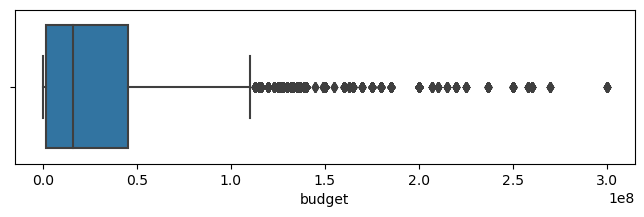

In [104]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = movie_df['budget'])

In [151]:
def outlier_remover(col) :
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    col[col < lower_limit] = lower_limit
    col[col > upper_limit] = upper_limit
    return col

In [106]:
outlier_remover(movie_df['budget'])

0        30000000
1        30000000
2        30000000
3        30000000
4        30000000
           ...   
96227           0
96228           0
96229           0
96230           0
96231           0
Name: budget, Length: 96232, dtype: int32

In [107]:
def dist(data, col) :
    mean_val = data[col].mean() 
    median_val = data[col].median()
    mode_val = data[col].mode()[0]

    sns.histplot(data[col], kde=False, color='lightblue')
    plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
    plt.axvline(median_val, color='green', linestyle='--', label='Median')
    plt.axvline(mode_val, color='blue', linestyle='--', label='Mode')
    plt.xticks(rotation = 45)
    plt.legend()

In [7]:
import pandas as pd

# Adjust the budget list to match the length of the value list
data = {
    'value': [round(i * 0.01, 2) for i in range(101)],
    'budget': [0.00] * 101  # Initialize all budgets to 0.00
}

# Update specific budget values at specific indices
budget_values = [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 
                 130000000.00, 150000000.00, 160000000.00, 
                 200000000.00, 380000000.00]

for i, value in enumerate(budget_values):
    if i + 6 < len(data['budget']):  # Adjust indices according to your needs
        data['budget'][i + 6] = value

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame to verify
df


,value,budget
0,0.00,0.0
1,0.01,0.0
2,0.02,0.0
3,0.03,0.0
4,0.04,0.0
...,...,...
96,0.96,0.0
97,0.97,0.0
98,0.98,0.0
99,0.99,0.0


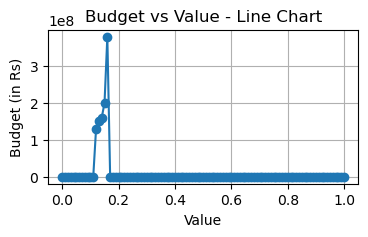

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 2))
plt.plot(df['value'], df['budget'], marker='o')
plt.title('Budget vs Value - Line Chart')
plt.xlabel('Value')
plt.ylabel('Budget (in Rs)')
plt.grid()
plt.show()


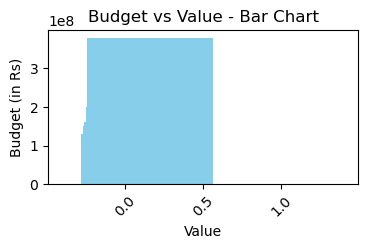

In [11]:
plt.figure(figsize=(4, 2))
plt.bar(df['value'], df['budget'], color='skyblue')
plt.title('Budget vs Value - Bar Chart')
plt.xlabel('Value')
plt.ylabel('Budget (in Rs)')
plt.xticks(rotation=45)
plt.show()


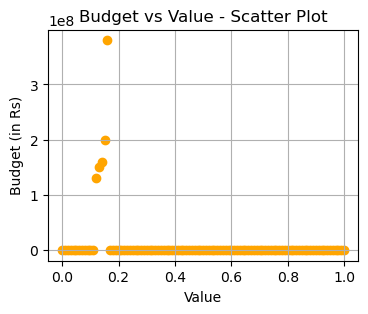

In [12]:
plt.figure(figsize=(4, 3))
plt.scatter(df['value'], df['budget'], color='orange')
plt.title('Budget vs Value - Scatter Plot')
plt.xlabel('Value')
plt.ylabel('Budget (in Rs)')
plt.grid()
plt.show()


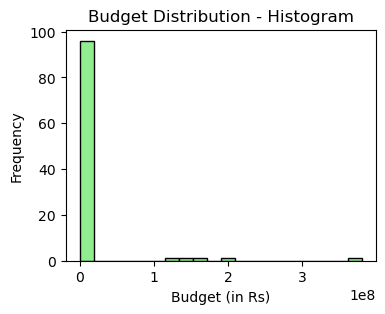

In [13]:
plt.figure(figsize=(4, 3))
plt.hist(df['budget'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Budget Distribution - Histogram')
plt.xlabel('Budget (in Rs)')
plt.ylabel('Frequency')
plt.show()

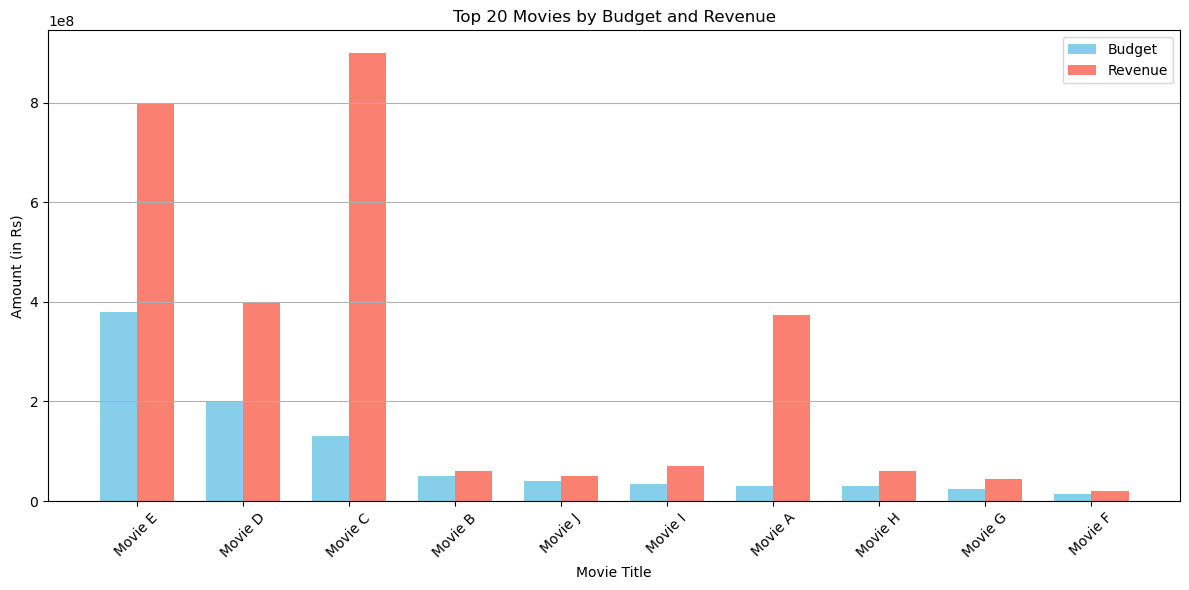

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation
data = {
    'title': ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E', 
              'Movie F', 'Movie G', 'Movie H', 'Movie I', 'Movie J'],
    'budget': [30000000, 50000000, 130000000, 200000000, 380000000, 
               15000000, 25000000, 30000000, 35000000, 40000000],
    'revenue': [373554033, 60000000, 900000000, 400000000, 800000000, 
                20000000, 45000000, 60000000, 70000000, 50000000]
}
movie_df = pd.DataFrame(data)

def combined_bar_plot(col, budget_col, revenue_col):
    # Calculate total budget and revenue
    total_data = movie_df.groupby(col).agg({budget_col: 'sum', revenue_col: 'sum'}).reset_index()
    total_data.columns = [col, budget_col, revenue_col]
    
    # Sort and get the top 20
    top_data = total_data.sort_values(by=budget_col, ascending=False).head(20)
    top_data[col] = top_data[col].apply(lambda x: ' '.join(x.split()[:3]))  # Take first 3 words for titles

    # Set the bar width
    bar_width = 0.35
    x = range(len(top_data))

    plt.figure(figsize=[12, 6])
    
    # Create bars for budget
    plt.bar(x, top_data[budget_col], width=bar_width, label='Budget', color='skyblue', align='center')
    
    # Create bars for revenue
    plt.bar([p + bar_width for p in x], top_data[revenue_col], width=bar_width, label='Revenue', color='salmon', align='center')

    # Add titles and labels
    plt.title(f'Top 20 Movies by Budget and Revenue')
    plt.xlabel('Movie Title')
    plt.ylabel('Amount (in Rs)')
    plt.xticks([p + bar_width / 2 for p in x], top_data[col], rotation=45)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Call the combined bar plot function
combined_bar_plot('title', 'budget', 'revenue')


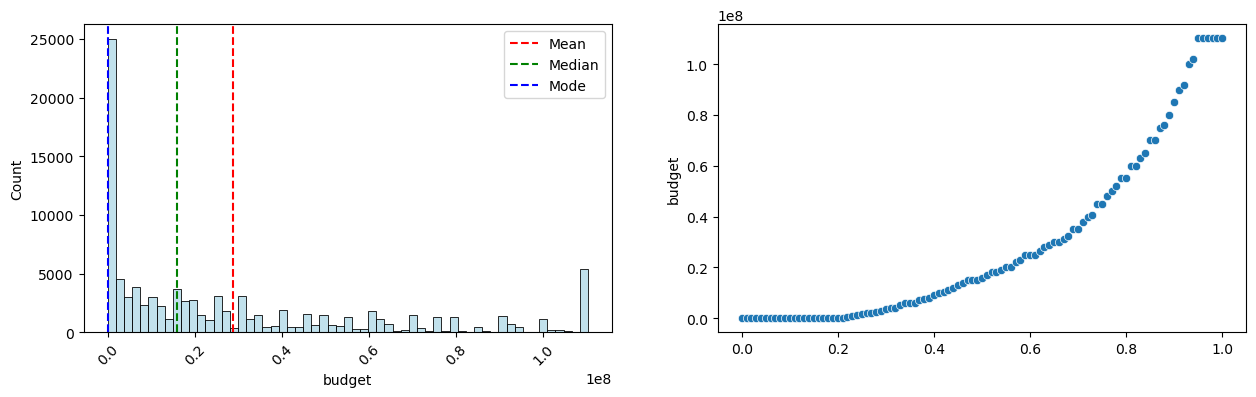

In [108]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movie_df, 'budget')
plt.subplot(1, 2, 2)
sns.scatterplot(movie_df['budget'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

In [109]:
movie_df['original_language'].value_counts().head()

original_language
en    90590
fr     1587
ja      860
de      644
it      529
Name: count, dtype: int64

In [110]:
def bar_plot(col) :
    top_names = movie_df[col].value_counts().head(20).reset_index()
    top_names.columns = [col, 'Count']

    plt.figure(figsize = [12, 6])
    sns.barplot(data = top_names, x = col, y = 'Count', palette = 'pastel')
    plt.title(f'Top 20 Borrower {col}', fontsize = 16)
    plt.xlabel(f'Borrower {col}', fontsize = 14)
    plt.ylabel('Count', fontsize = 14)
    plt.xticks(rotation = 45, ha = 'right') 
    plt.tight_layout()
    
def per_bar_plot(col):
    top_names = movie_df[col].value_counts().head(10).reset_index()
    top_names.columns = [col, 'Count']

    plt.figure(figsize=[12, 6])
    sns.barplot(data=top_names, x=col, y='Count', palette='pastel')
    plt.title(f'Top 10 Borrower {col}', fontsize=16)
    plt.xlabel(f'Borrower {col}', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    
    total_count = top_names['Count'].sum()
    for index, row in top_names.iterrows():
        percentage = (row['Count'] / total_count) * 100
        plt.text(index, row['Count'] + 0.5, f'{percentage:.1f}%', ha='center')

    plt.tight_layout()

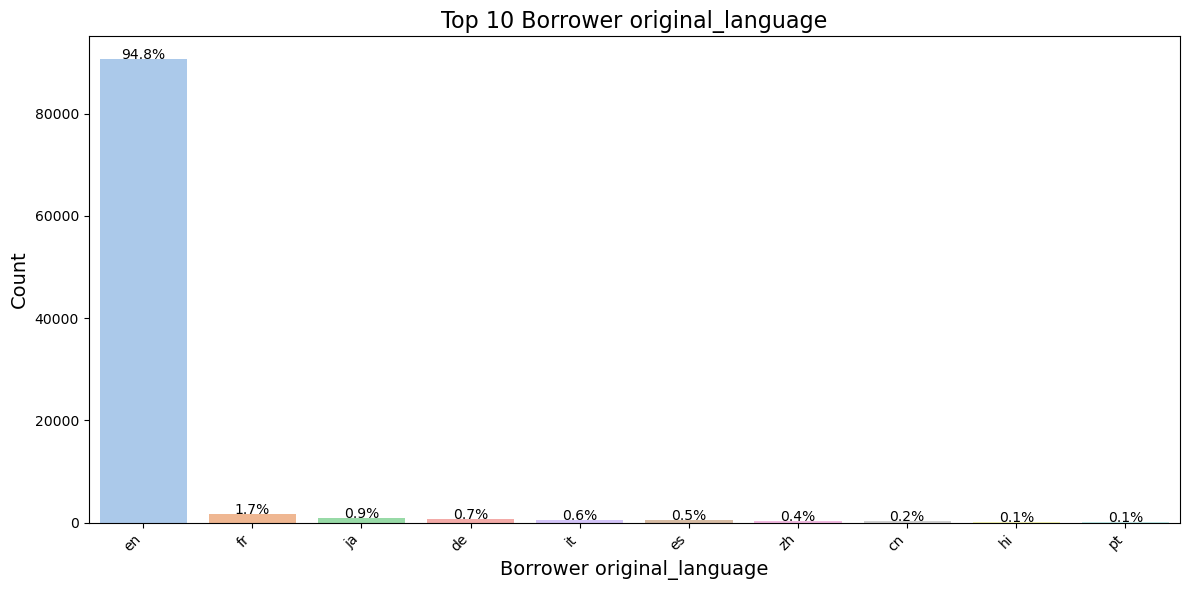

In [111]:
per_bar_plot('original_language')

In [112]:
movie_df['overview'].describe()

count                                                 96088
unique                                                 7613
top       A man with a low IQ has accomplished great thi...
freq                                                    341
Name: overview, dtype: object

In [113]:
movie_df['overview'].value_counts().head()

overview
A man with a low IQ has accomplished great things in his life and been present during significant historic events - in each case, far exceeding what anyone imagined he could do. Yet, despite all the things he has attained, his one true love eludes him. 'Forrest Gump' is the story of a man who rose above his challenges, and who proved that determination, courage, and love are more important than ability.    341
A burger-loving hit man, his philosophical partner, a drug-addled gangster's moll and a washed-up boxer converge in this sprawling, comedic crime caper. Their adventures unfurl in three stories that ingeniously trip back and forth in time.                                                                                                                                                                           324
Framed in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his a

In [114]:
movie_df['overview'].fillna('No overview found', inplace = True)

     We'll the given overview column doesn't have some imporatnt to outr task and nothing to replace so 
     decided to impute by '' No overview found '' so imputed it 

In [115]:
movie_df['poster_path'].head()

0    /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1    /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
2    /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
3    /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
4    /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
Name: poster_path, dtype: object

In [116]:
movie_df['runtime'].median()

111.0

<Axes: xlabel='runtime'>

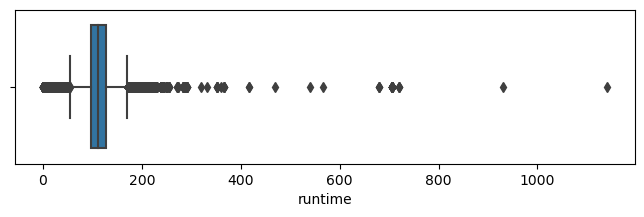

In [117]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = movie_df['runtime'])

In [118]:
outlier_remover(movie_df['runtime'])

0        81.0
1        81.0
2        81.0
3        81.0
4        81.0
         ... 
96227    60.0
96228    60.0
96229    60.0
96230    60.0
96231    60.0
Name: runtime, Length: 96232, dtype: float64

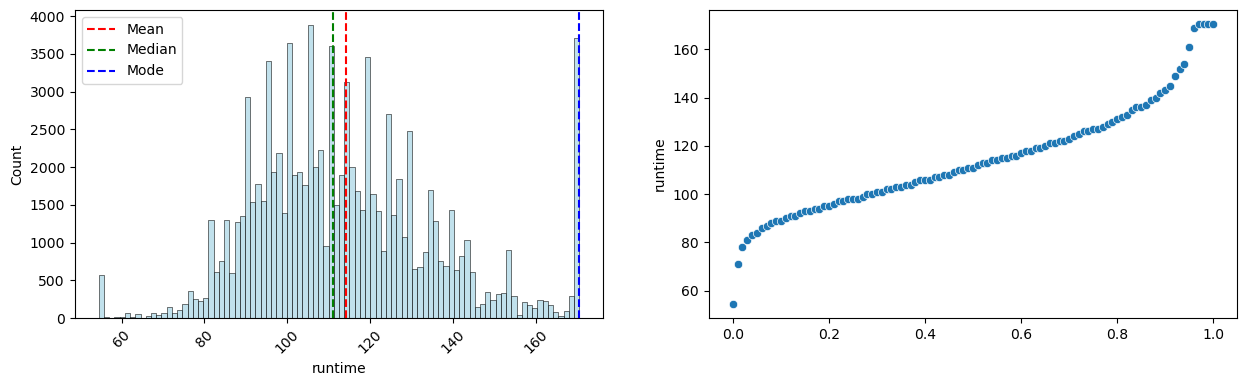

In [119]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movie_df, 'runtime')
plt.subplot(1, 2, 2)
sns.scatterplot(movie_df['runtime'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

In [120]:
movie_df['runtime'].fillna(movie_df['runtime'].median(), inplace = True)

In [121]:
movie_df['status'].value_counts()

status
Released           96159
Post Production       44
Rumored               20
Name: count, dtype: int64

In [122]:
movie_df['status'].fillna(movie_df['status'].mode()[0], inplace = True)

In [123]:
movie_df['release_date'].value_counts().head()

release_date
1995-12-29    422
1994-09-10    372
1994-07-06    341
1990-11-09    336
1995-07-19    329
Name: count, dtype: int64

In [124]:
movie_df['release_date'].fillna(movie_df['release_date'].mode()[0], inplace = True)

In [125]:
movie_df['tagline'].mode()[0]

"The world will never be the same, once you've seen it through the eyes of Forrest Gump."

    We'll the tagline is just about the tag words it not must be inportant but have to fill with saome values
        so filling it with no caption or tagline

In [126]:
movie_df['tagline'].fillna('No tagline', inplace = True)

In [127]:
movie_df['poster_path'].fillna(movie_df['poster_path'].mode()[0], inplace = True)

In [128]:
movie_df.columns

Index(['budget', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'release_date', 'revenue', 'runtime',
       'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count',
       'timestamp'],
      dtype='object')

In [129]:
null_counter(movie_df)

,column name,total count,percentage


    Now our data is now cleared here

In [130]:
movie_df.head()

,budget,original_language,original_title,overview,popularity,poster_path,release_date,revenue,runtime,status,tagline,title,video,vote_average,vote_count,timestamp
0,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,No tagline,Toy Story,False,7.7,5415.0,851866703
1,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,No tagline,Toy Story,False,7.7,5415.0,938629179
2,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,No tagline,Toy Story,False,7.7,5415.0,1331380058
3,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,No tagline,Toy Story,False,7.7,5415.0,997938310
4,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,No tagline,Toy Story,False,7.7,5415.0,855190091


In [131]:
movie_df['timestamp']

0         851866703
1         938629179
2        1331380058
3         997938310
4         855190091
            ...    
96227    1445697527
96228    1297603199
96229    1462945966
96230    1437001235
96231    1435785901
Name: timestamp, Length: 96232, dtype: int64

In [132]:
movie_df['timestamp'] = pd.to_datetime(movie_df['timestamp'], unit='s')

In [133]:
movie_df['timestamp']

0       1996-12-29 13:38:23
1       1999-09-29 18:19:39
2       2012-03-10 11:47:38
3       2001-08-16 05:05:10
4       1997-02-06 00:48:11
                ...        
96227   2015-10-24 14:38:47
96228   2011-02-13 13:19:59
96229   2016-05-11 05:52:46
96230   2015-07-15 23:00:35
96231   2015-07-01 21:25:01
Name: timestamp, Length: 96232, dtype: datetime64[ns]

In [138]:
movie_df.head(20)

,budget,original_language,original_title,overview,popularity,poster_path,release_date,revenue,runtime,status,tagline,title,video,vote_average,vote_count,timestamp
0,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,No tagline,Toy Story,False,7.7,5415.0,1996-12-29 13:38:23
1,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,No tagline,Toy Story,False,7.7,5415.0,1999-09-29 18:19:39
2,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,No tagline,Toy Story,False,7.7,5415.0,2012-03-10 11:47:38
3,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,No tagline,Toy Story,False,7.7,5415.0,2001-08-16 05:05:10
4,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,No tagline,Toy Story,False,7.7,5415.0,1997-02-06 00:48:11
5,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,No tagline,Toy Story,False,7.7,5415.0,2009-04-03 03:36:07
6,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,No tagline,Toy Story,False,7.7,5415.0,2006-05-27 11:37:33
7,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,No tagline,Toy Story,False,7.7,5415.0,2013-02-05 18:13:00
8,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,No tagline,Toy Story,False,7.7,5415.0,1999-12-11 20:11:10
9,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,No tagline,Toy Story,False,7.7,5415.0,2001-02-04 17:35:21


In [137]:
movie_df['original_title'].value_counts().head(50)

original_title
Forrest Gump                                         341
Pulp Fiction                                         324
The Shawshank Redemption                             311
The Silence of the Lambs                             304
Star Wars                                            291
Jurassic Park                                        274
The Matrix                                           259
Toy Story                                            247
Schindler's List                                     244
Terminator 2: Judgment Day                           237
The Empire Strikes Back                              234
Braveheart                                           228
Back to the Future                                   226
Fargo                                                224
American Beauty                                      220
Raiders of the Lost Ark                              220
Independence Day                                     218
Return of the Je

In [ ]:
sns.scatterplot(data = sales_df, x = 'Discount', y = 'Profit', color = 'red')
plt.title('Scatter Plot of Discount vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)

In [ ]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

cred_df = pd.read_csv('DataSets/credits.csv')
key_df = pd.read_csv('DataSets/keywords.csv')
link = pd.read_csv('DataSets/links.csv')
link_sm = pd.read_csv('DataSets/links_small.csv')
movies = pd.read_csv('DataSets/movies_metadata.csv')
ratin = pd.read_csv('DataSets/ratings.csv')
ratin_sm = pd.read_csv('DataSets/ratings_small.csv')

print(f"The Shape of credits \nRows :{cred_df.shape[0]} & Columns : {cred_df.shape[1]}\n")
print(f"The Shape of keywords \nRows :{key_df.shape[0]} & Columns : {key_df.shape[1]}\n")
print(f"The Shape of links \nRows :{link.shape[0]} & Columns : {link.shape[1]}\n")
print(f"The Shape of links_small \nRows :{link_sm.shape[0]} & Columns : {link_sm.shape[1]}\n")
print(f"The Shape of movies_metadata \nRows :{movies.shape[0]} & Columns : {movies.shape[1]}\n")
print(f"The Shape of ratings \nRows :{ratin.shape[0]} & Columns : {ratin.shape[1]}\n")
print(f"The Shape of ratings_small \nRows :{ratin_sm.shape[0]} & Columns : {ratin_sm.shape[1]}\n")

link.head(1)

ratin.head(1)

key_df.head(1)

cred_df.head(1)

movies.head(20)

link_ratin_sm = pd.merge(link_sm, ratin_sm, on = 'movieId')

link_ratin_sm.shape

link_ratin_sm.head(1)

cred_key = pd.merge(cred_df, key_df, on = 'id')

cred_key.head(1)

movies['id'] = pd.to_numeric(movies['id'], errors='coerce')

movies = movies[movies['id'].notna()]

movies = pd.merge(movies, cred_key, on = 'id')

movies['imdb_id'] = movies['imdb_id'].str[3:]
movies = movies[movies['imdb_id'].notna()]
movies['imdb_id'] = movies['imdb_id'].astype(int)

movies.head(1)

movies = pd.merge(movies, link_ratin_sm, left_on = 'imdb_id', right_on = 'imdbId')

    Now we have a better columns to work upon and the relevent rows also.

movies.shape

movies.head(1)

    So finally we had combined or merged all the required files to work upon .
    and we got some atleast 100000 Rows with 33 columns.

    So lets check the Detail of the given set.

print(f"The Shape of Movie DataSet \nRows :{movies.shape[0]} & Columns : {movies.shape[1]}\n")

movies.info()

movies.describe()

def null_counter(data) :
    count = data.isnull().sum()
    percen = count / len(data) * 100

    count.sort_values(ascending = False)
    percen.sort_values(ascending = False)

    df_null = pd.DataFrame({
        'column name' : data.columns,
        'total count' : count,
        'percentage' : percen
    })

    df_null.reset_index(drop = True, inplace = True)
    df_null_sorted = df_null.sort_values(by='percentage', ascending=False)
    df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
    return df_filtered

null_counter(movies)

    Some feedback to given related Points :: 
        1 The dataset contains 100000+ Rows and 33 Columns.
        2 We have some Useless columns like the IDs and more.
        3 On the Null coluter we found that we have 74% Null Values in homepage 
            and 68% in belongs_to_collection and more.
        4 As some values seems outliers also so need to work upon it also.

movies.columns

movies.drop(['id', 'imdb_id', 'homepage', 'belongs_to_collection', 'movieId', 'imdbId', 'tmdbId', 'userId'], inplace = True, axis = 1)

movie_df =  movies.copy() 

movie_df

movie_df.drop(['production_companies', 'production_countries', 'spoken_languages', 'cast', 'crew', 'rating', 'genres' , 'keywords'], axis = 1, inplace = True)

null_val = null_counter(movie_df)['column name'].tolist()

movie_df.columns

movie_df['adult'].value_counts()

    As the given list have only False values just its case of data inbalance or only one values is there so 
        am dropping this column.

movie_df.drop('adult', inplace = True, axis = 1)

movie_df['budget'] = movie_df['budget'].astype(int)
movie_df['budget'].describe()

plt.figure(figsize = [8, 2])
sns.boxplot(x = movie_df['budget'])

def outlier_remover(col) :
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    col[col < lower_limit] = lower_limit
    col[col > upper_limit] = upper_limit
    return col

outlier_remover(movie_df['budget'])

def dist(data, col) :
    mean_val = data[col].mean() 
    median_val = data[col].median()
    mode_val = data[col].mode()[0]

    sns.histplot(data[col], kde=False, color='lightblue')
    plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
    plt.axvline(median_val, color='green', linestyle='--', label='Median')
    plt.axvline(mode_val, color='blue', linestyle='--', label='Mode')
    plt.xticks(rotation = 45)
    plt.legend()

plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movie_df, 'budget')
plt.subplot(1, 2, 2)
sns.scatterplot(movie_df['budget'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

movie_df['original_language'].value_counts().head()

def bar_plot(col) :
    top_names = movie_df[col].value_counts().head(20).reset_index()
    top_names.columns = [col, 'Count']

    plt.figure(figsize = [12, 6])
    sns.barplot(data = top_names, x = col, y = 'Count', palette = 'pastel')
    plt.title(f'Top 20 Borrower {col}', fontsize = 16)
    plt.xlabel(f'Borrower {col}', fontsize = 14)
    plt.ylabel('Count', fontsize = 14)
    plt.xticks(rotation = 45, ha = 'right') 
    plt.tight_layout()
    
def per_bar_plot(col):
    top_names = movie_df[col].value_counts().head(10).reset_index()
    top_names.columns = [col, 'Count']

    plt.figure(figsize=[12, 6])
    sns.barplot(data=top_names, x=col, y='Count', palette='pastel')
    plt.title(f'Top 10 Borrower {col}', fontsize=16)
    plt.xlabel(f'Borrower {col}', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    
    total_count = top_names['Count'].sum()
    for index, row in top_names.iterrows():
        percentage = (row['Count'] / total_count) * 100
        plt.text(index, row['Count'] + 0.5, f'{percentage:.1f}%', ha='center')

    plt.tight_layout()



per_bar_plot('original_language')

movie_df['overview'].describe()

movie_df['overview'].value_counts().head()

movie_df['overview'].fillna('No overview found', inplace = True)

     We'll the given overview column doesn't have some imporatnt to outr task and nothing to replace so 
     decided to impute by '' No overview found '' so imputed it 

movie_df['poster_path'].head()

movie_df['runtime'].median()

plt.figure(figsize = [8, 2])
sns.boxplot(x = movie_df['runtime'])

outlier_remover(movie_df['runtime'])

plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movie_df, 'runtime')
plt.subplot(1, 2, 2)
sns.scatterplot(movie_df['runtime'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

movie_df['runtime'].fillna(movie_df['runtime'].median(), inplace = True)

movie_df['status'].value_counts()

movie_df['status'].fillna(movie_df['status'].mode()[0], inplace = True)

movie_df['release_date'].value_counts().head()

movie_df['release_date'].fillna(movie_df['release_date'].mode()[0], inplace = True)

movie_df['tagline'].mode()[0]

    We'll the tagline is just about the tag words it not must be inportant but have to fill with saome values
        so filling it with no caption or tagline

movie_df['tagline'].fillna('No tagline', inplace = True)

movie_df['poster_path'].fillna(movie_df['poster_path'].mode()[0], inplace = True)

movie_df.columns

null_counter(movie_df)

    Now our data is now cleared here

movie_df.head()

movie_df['timestamp']

movie_df['timestamp'] = pd.to_datetime(movie_df['timestamp'], unit='s')

movie_df['timestamp']

movie_df.head(20)

movie_df['original_title'].value_counts().head(50)









sns.scatterplot(data = sales_df, x = 'Discount', y = 'Profit', color = 'red')
plt.title('Scatter Plot of Discount vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)







In [73]:
cast_info = []

In [102]:
for index in range(len(cred_df['cast'])):
    cast_info.extend(cred_df['cast'][index])

In [104]:
len(cast_info)

562474

In [105]:
crew_info = []

In [106]:
for index in range(len(cred_df['crew'])):
    crew_info.extend(cred_df['crew'][index])

In [107]:
len(crew_info)

464314

In [111]:
cast_df = pd.DataFrame(cast_info)

In [113]:
cast_df

,cast_id,character,credit_id,gender,id,name,order,profile_path
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg
1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg
2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg
3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg
4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg
...,...,...,...,...,...,...,...,...
562469,2,,52fe4ea59251416c7515d7d5,2,544742,Iwan Mosschuchin,0,None
562470,3,,52fe4ea59251416c7515d7d9,1,1090923,Nathalie Lissenko,1,None
562471,4,,52fe4ea59251416c7515d7dd,2,1136422,Pavel Pavlov,2,None
562472,5,,52fe4ea59251416c7515d7e1,0,1261758,Aleksandr Chabrov,3,None


In [1]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
movies = pd.read_csv('DataSets/movies_metadata.csv')

In [3]:
print(f"The Shape of movies_metadata \nRows :{movies.shape[0]} & Columns : {movies.shape[1]}")

The Shape of movies_metadata 
Rows :45466 & Columns : 24


In [4]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,45460.00,45203.00,45460.00,45460.00
mean,11209348.54,94.13,5.62,109.90
std,64332246.74,38.41,1.92,491.31
min,0.00,0.00,0.00,0.00
25%,0.00,85.00,5.00,3.00
50%,0.00,95.00,6.00,10.00
75%,0.00,107.00,6.80,34.00
max,2787965087.00,1256.00,10.00,14075.00


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

##### As we have 7 DataSets and we have to work upon them carefully as we need!

    So Working upon the Creditors dataframe first then will shift on other :
        1 About this given dataset there is 3 columns >> Cast >> Crew >> ID
            NOTE -- in the creditors columns we have some unique type of entries they are in form of
                    String > List > Dictionary ** n 
            So we need to segregate the values as per our need.

In [6]:
movies.head().head(3).transpose()

,0,1,2
adult,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect..."
budget,30000000,65000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
homepage,http://toystory.disney.com/toy-story,NaN,NaN
id,862,8844,15602
imdb_id,tt0114709,tt0113497,tt0113228
original_language,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...


    We'll the dataset some relevent features but some are decoded and have to fetch for it.
    Like the features are :
        1.genres        2.production_companies        3.production_countries        4.spoken_languages
    So lets work upon the given data.

In [7]:
movies[['genres', 'production_companies', 'production_countries', 'spoken_languages']]

,genres,production_companies,production_countries,spoken_languages
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
4,"[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
...,...,...,...,...
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]","[{'iso_639_1': 'fa', 'name': 'فارسی'}]"
45462,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]","[{'iso_639_1': 'tl', 'name': ''}]"
45463,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...","[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
45464,[],"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",[]


In [8]:
movies['spoken_languages'][0]

"[{'iso_639_1': 'en', 'name': 'English'}]"

In [9]:
import json

In [10]:
def str_extractor(companies_str):
    if isinstance(companies_str, str):
        companies_str = companies_str.replace("'", '"')
        try:
            companies = json.loads(companies_str)
    
            return companies[0]['name'] if companies else np.nan
        except json.JSONDecodeError:
            return np.nan
    else:
        return np.nan

In [11]:
movies['production_companies'] = movies['production_companies'].apply(str_extractor)
movies['production_companies'].head()

0                   Pixar Animation Studios
1                          TriStar Pictures
2                              Warner Bros.
3    Twentieth Century Fox Film Corporation
4                     Sandollar Productions
Name: production_companies, dtype: object

In [12]:
movies['production_companies'].fillna(movies['production_companies'].mode()[0], inplace = True)

In [13]:
movies['production_countries'].value_counts().head(10)

production_countries
[{'iso_3166_1': 'US', 'name': 'United States of America'}]    17851
[]                                                             6282
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]               2238
[{'iso_3166_1': 'FR', 'name': 'France'}]                       1654
[{'iso_3166_1': 'JP', 'name': 'Japan'}]                        1356
[{'iso_3166_1': 'IT', 'name': 'Italy'}]                        1030
[{'iso_3166_1': 'CA', 'name': 'Canada'}]                        840
[{'iso_3166_1': 'DE', 'name': 'Germany'}]                       749
[{'iso_3166_1': 'RU', 'name': 'Russia'}]                        735
[{'iso_3166_1': 'IN', 'name': 'India'}]                         735
Name: count, dtype: int64

In [14]:
movies[movies['production_countries'] ==  np.NaN]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [15]:
nan_mask = movies['production_countries'].isna()
print("Entries with NaN in production_countries:")
movies[nan_mask]

Entries with NaN in production_countries:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,Paramount Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,False,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,NaN,NaN,Paramount Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,NaN,NaN,Paramount Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
movies = movies.dropna(subset=['production_countries'])

In [17]:
nan_mask = movies['production_countries'].isna()
print("Entries with NaN in production_countries:")
movies[nan_mask]

Entries with NaN in production_countries:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [18]:
def extract_production_countries(countries_str):
    if isinstance(countries_str, str):
        countries_str = countries_str.replace("'", '"')
        try:
            countries = json.loads(countries_str)
            return [country['name'] for country in countries if 'name' in country]
        except json.JSONDecodeError:
            return []
    return []

In [19]:
# movies['production_countries'] = movies['production_countries'].apply(extract_production_countries)
# country_cols = movies['production_countries'].apply(pd.Series)

# # Rename the country columns
# if not country_cols.empty:
#     country_cols.columns = [f'country_{i+1}' for i in range(country_cols.shape[1])]

# # Concatenate the new country columns with the original DataFrame
# movies = pd.concat([movies, country_cols], axis=1)

In [20]:
movies.drop('production_countries', axis = 1, inplace = True)

In [21]:
movies['spoken_languages'] = movies['spoken_languages'].apply(str_extractor)
movies['spoken_languages']

0        English
1        English
2        English
3        English
4        English
          ...   
45461      فارسی
45462           
45463    English
45464        NaN
45465    English
Name: spoken_languages, Length: 45463, dtype: object

In [22]:
def extract_genres(genres_str):
    if isinstance(genres_str, str):
        genres_str = genres_str.replace("'", '"')
        try:
            genres = json.loads(genres_str)
            return [genre['name'] for genre in genres]
        except json.JSONDecodeError:
            return []
    return []

In [23]:
movies['genres'] = movies['genres'].apply(extract_genres)
genre_cols = movies['genres'].apply(pd.Series)
genre_cols.columns = [f'genre_{i+1}' for i in range(genre_cols.shape[1])]
movies = pd.concat([movies, genre_cols], axis=1)

In [24]:
def null_counter(data) :
    count = data.isnull().sum()
    percen = count / len(data) * 100

    count.sort_values(ascending = False)
    percen.sort_values(ascending = False)

    df_null = pd.DataFrame({
        'column name' : data.columns,
        'total count' : count,
        'percentage' : percen
    })

    df_null.reset_index(drop = True, inplace = True)
    df_null_sorted = df_null.sort_values(by='percentage', ascending=False)
    df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
    return df_filtered

In [25]:
null_values = null_counter(movies)[null_counter(movies)['percentage'] > 30]['column name'].tolist()
null_values

['genre_8',
 'genre_7',
 'genre_6',
 'genre_5',
 'genre_4',
 'belongs_to_collection',
 'homepage',
 'genre_3',
 'tagline',
 'genre_2']

In [26]:
movies.drop(null_values, axis = 1, inplace = True)
movies.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'video', 'vote_average', 'vote_count', 'genre_1'], dtype='object')

In [27]:
null_counter(movies)

,column name,total count,percentage
14,spoken_languages,3858,8.49
20,genre_1,2442,5.37
7,overview,954,2.10
9,poster_path,383,0.84
13,runtime,260,0.57
15,status,84,0.18
11,release_date,84,0.18
4,imdb_id,17,0.04
5,original_language,11,0.02
19,vote_count,3,0.01


In [28]:
null_valer = null_counter(movies)['column name'].tolist()

In [29]:
for val in null_valer :
    if val in movies.columns :
        if movies[val].dtype == object :
            movies[val].fillna(movies[val].mode()[0], inplace = True)
        else :
            movies[val].fillna(movies[val].median(), inplace = True)            

In [30]:
null_counter(movies)

,column name,total count,percentage


    We'll we had imputedd Null values by there desired data.
        Working on EDA (Exploartory Data Analysis) and more in it.

##### Exploratory Data Analysis ( EDA )

In [31]:
movies.shape

(45463, 21)

In [32]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45463 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45463 non-null  object 
 1   budget                45463 non-null  object 
 2   genres                45463 non-null  object 
 3   id                    45463 non-null  object 
 4   imdb_id               45463 non-null  object 
 5   original_language     45463 non-null  object 
 6   original_title        45463 non-null  object 
 7   overview              45463 non-null  object 
 8   popularity            45463 non-null  object 
 9   poster_path           45463 non-null  object 
 10  production_companies  45463 non-null  object 
 11  release_date          45463 non-null  object 
 12  revenue               45463 non-null  float64
 13  runtime               45463 non-null  float64
 14  spoken_languages      45463 non-null  object 
 15  status                45

In [33]:
movies.isnull().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
genre_1                 0
dtype: int64

In [34]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,45463.00,45463.00,45463.00,45463.00
mean,11208608.86,94.13,5.62,109.89
std,64330188.53,38.30,1.92,491.29
min,0.00,0.00,0.00,0.00
25%,0.00,85.00,5.00,3.00
50%,0.00,95.00,6.00,10.00
75%,0.00,107.00,6.80,34.00
max,2787965087.00,1256.00,10.00,14075.00


    First treating the numerical values as they seems to differ. 

<Axes: xlabel='vote_count'>

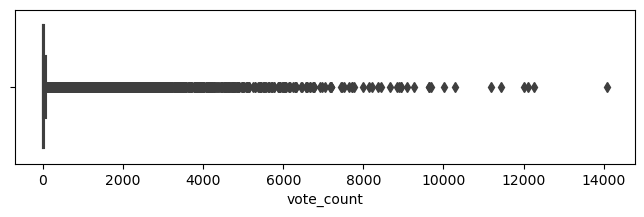

In [48]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = movies['vote_count'])

<Axes: xlabel='vote_average'>

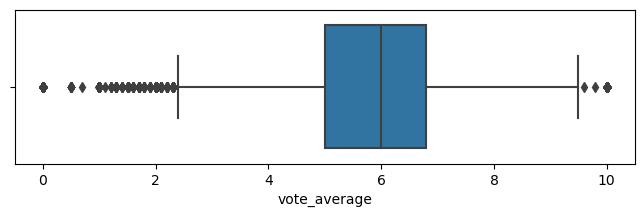

In [36]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = movies['vote_average'])

<Axes: xlabel='runtime'>

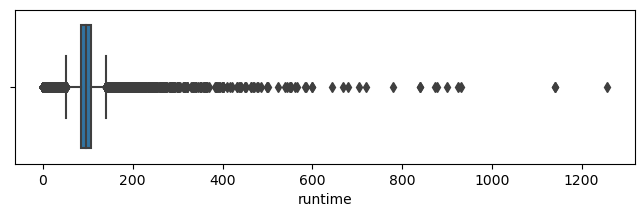

In [37]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = movies['runtime'])

<Axes: xlabel='revenue'>

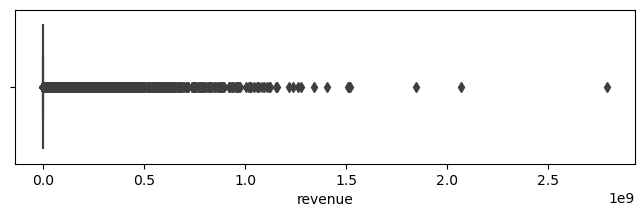

In [38]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = movies['revenue'])

In [39]:
def dist(data, col) :
    mean_val = data[col].mean() 
    median_val = data[col].median()
    mode_val = data[col].mode()[0]

    sns.histplot(data[col], kde=False, color='lightblue')
    plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
    plt.axvline(median_val, color='green', linestyle='--', label='Median')
    plt.axvline(mode_val, color='blue', linestyle='--', label='Mode')
    plt.xticks(rotation = 45)
    plt.legend()

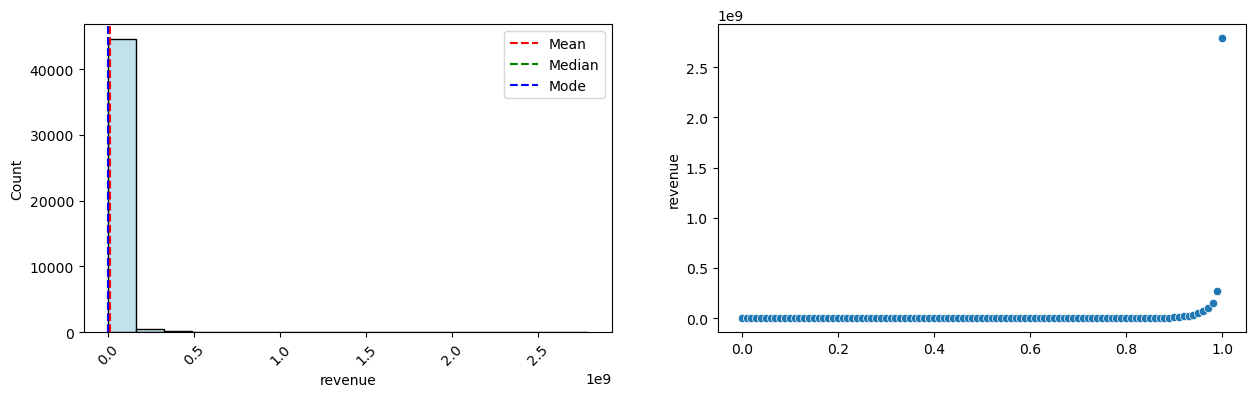

In [40]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movies, 'revenue')
plt.subplot(1, 2, 2)
sns.scatterplot(movies['revenue'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

In [41]:
def outlier_remover(col) :
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    col[col < lower_limit] = lower_limit
    col[col > upper_limit] = upper_limit
    return col

In [42]:
outlier_remover(movies['revenue'])

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
45461   0.00
45462   0.00
45463   0.00
45464   0.00
45465   0.00
Name: revenue, Length: 45463, dtype: float64

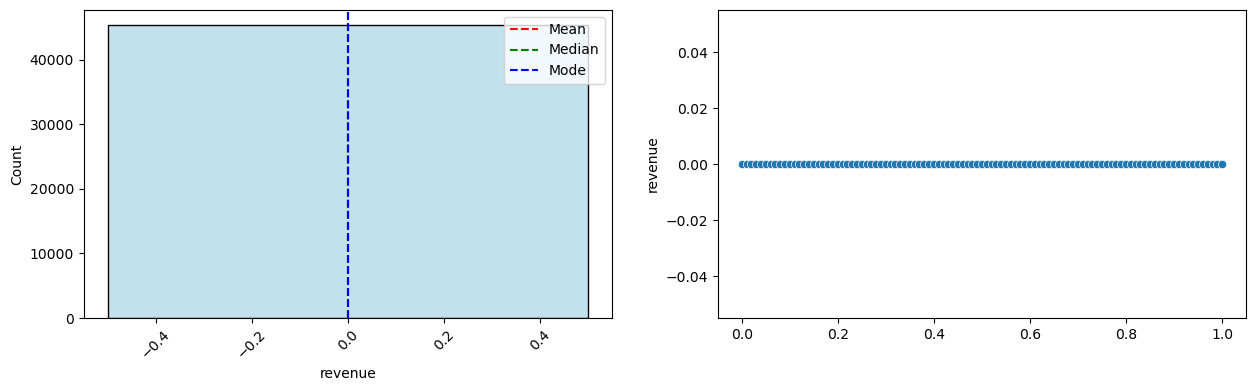

In [43]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movies, 'revenue')
plt.subplot(1, 2, 2)
sns.scatterplot(movies['revenue'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

In [44]:
movies.drop('revenue', axis = 1, inplace = True)

In [45]:
outlier_remover(movies['runtime'])

0        81.00
1       104.00
2       101.00
3       127.00
4       106.00
         ...  
45461    90.00
45462   140.00
45463    90.00
45464    87.00
45465    75.00
Name: runtime, Length: 45463, dtype: float64

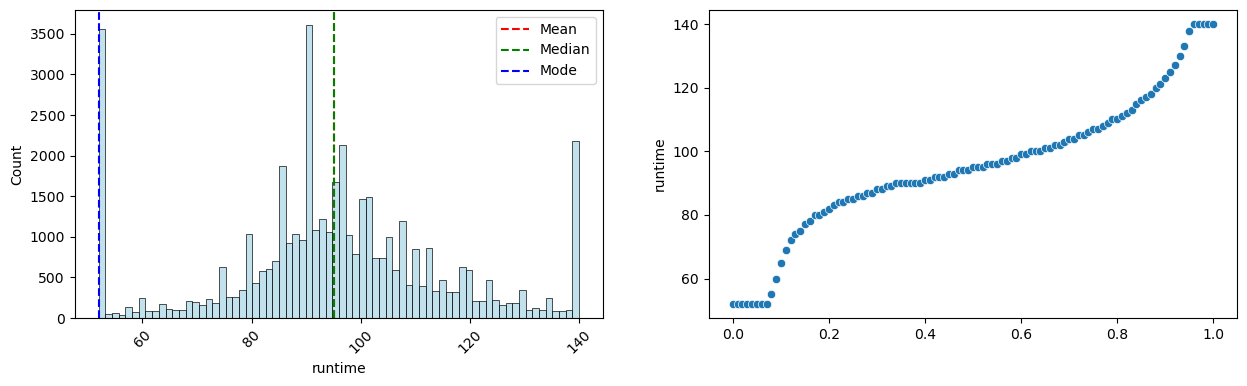

In [47]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movies, 'runtime')
plt.subplot(1, 2, 2)
sns.scatterplot(movies['runtime'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

In [49]:
outlier_remover(movies['vote_average'])

0       7.70
1       6.90
2       6.50
3       6.10
4       5.70
        ... 
45461   4.00
45462   9.00
45463   3.80
45464   2.30
45465   2.30
Name: vote_average, Length: 45463, dtype: float64

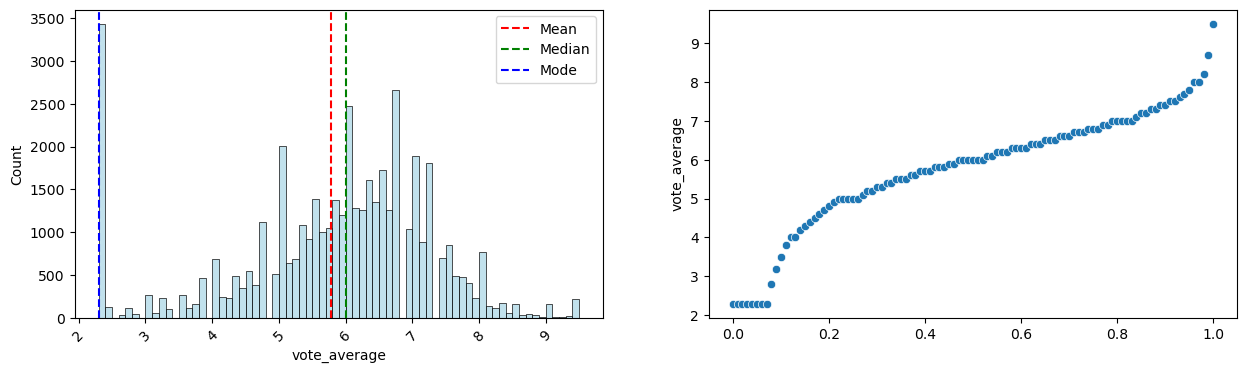

In [50]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movies, 'vote_average')
plt.subplot(1, 2, 2)
sns.scatterplot(movies['vote_average'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

In [51]:
outlier_remover(movies['vote_count'])

0       80.50
1       80.50
2       80.50
3       34.00
4       80.50
         ... 
45461    1.00
45462    3.00
45463    6.00
45464    0.00
45465    0.00
Name: vote_count, Length: 45463, dtype: float64

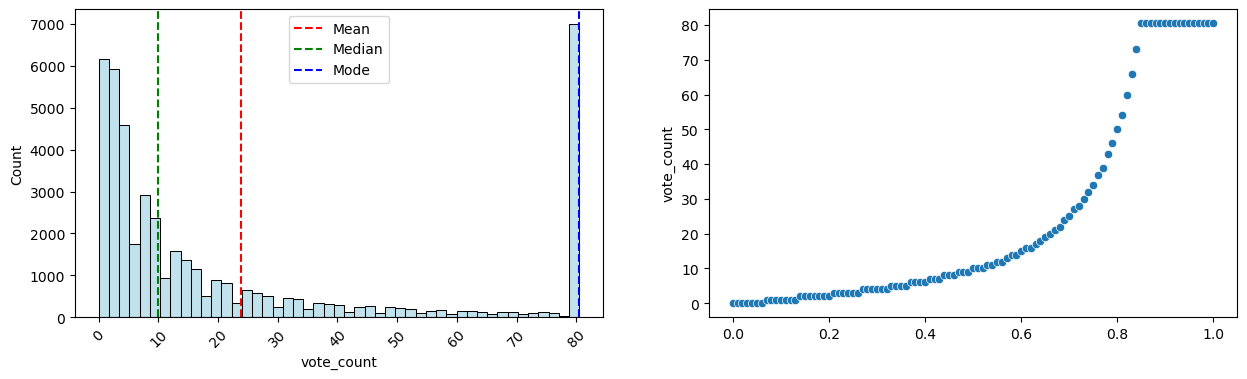

In [52]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movies, 'vote_count')
plt.subplot(1, 2, 2)
sns.scatterplot(movies['vote_count'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

    Handling the Categorical Values.

In [62]:
movies.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'release_date', 'runtime', 'spoken_languages', 'status', 'title', 'video', 'vote_average', 'vote_count', 'genre_1'], dtype='object')

In [69]:
movies['adult'].value_counts()

adult
False                                                                                                                             45451
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: count, dtype: int64

In [80]:
def bar_plot(col) :
    top_names = movies[col].value_counts().head(20).reset_index()
    top_names.columns = [col, 'Count']

    # Limit the labels to the first 3 words
    top_names[col] = top_names[col].apply(lambda x: ' '.join(x.split()[:3]))

    plt.figure(figsize=[10, 6])
    sns.barplot(data=top_names, x=col, y='Count', palette='pastel')
    plt.title(f'Top 20 Borrower {col}', fontsize=16)
    plt.xlabel(f'Borrower {col}', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

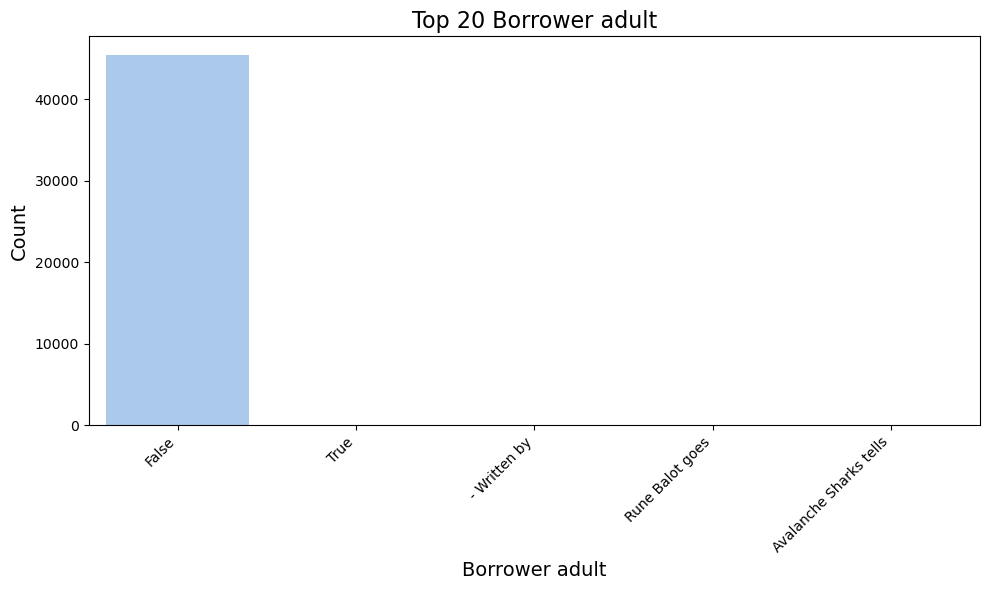

In [81]:
bar_plot('adult')

    As the given list have only False values just its case of data inbalance or only one values is there so 
        am dropping this column.

In [83]:
movies.drop('adult', inplace = True, axis = 1)

In [86]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
# movies['budget'] = movies['budget'].astype(int)
movies['budget'].describe()

count       45460.00
mean      4224857.60
std      17424673.77
min             0.00
25%             0.00
50%             0.00
75%             0.00
max     380000000.00
Name: budget, dtype: float64

<Axes: xlabel='budget'>

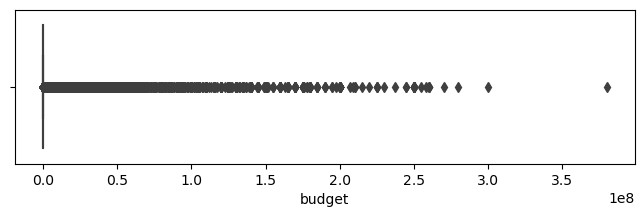

In [87]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = movies['budget'])

In [88]:
outlier_remover(movies['budget'])

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
45461   0.00
45462   0.00
45463   0.00
45464   0.00
45465   0.00
Name: budget, Length: 45463, dtype: float64

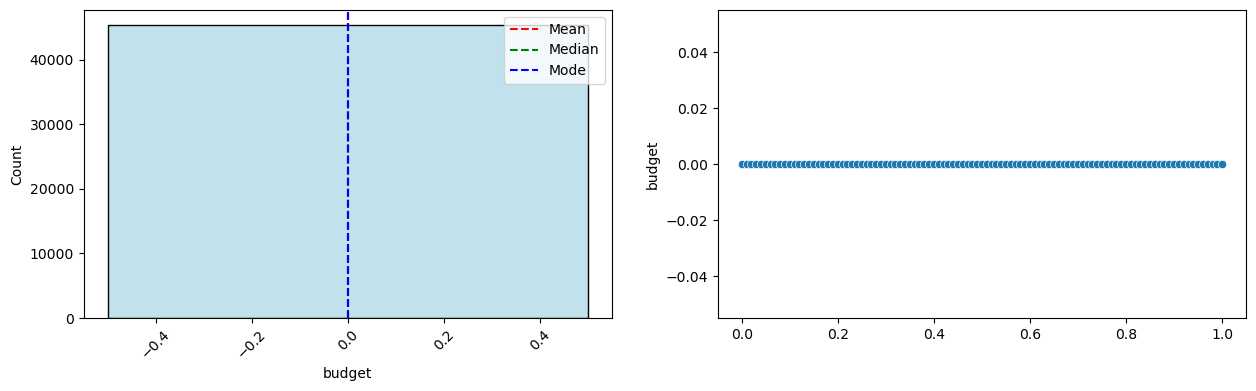

In [89]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movies, 'budget')
plt.subplot(1, 2, 2)
sns.scatterplot(movies['budget'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

In [90]:
movies.drop('budget', inplace = True, axis = 1)

In [92]:
movies['genres']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres, Length: 45463, dtype: object

    We'll we have this one so not needed right now.

In [93]:
movies.drop('genres', axis = 1, inplace = True)

In [96]:
movies[['id', 'imdb_id']].head()

,id,imdb_id
0,862,tt0114709
1,8844,tt0113497
2,15602,tt0113228
3,31357,tt0114885
4,11862,tt0113041


    We'll this both also dont in use in our EDA so am removing them too.

In [98]:
movies.drop(['id', 'imdb_id'], axis = 1, inplace = True)

In [103]:
movies['original_language'].value_counts()

original_language
en       32278
fr        2438
it        1529
ja        1349
de        1080
         ...  
zu           1
qu           1
104.0        1
la           1
si           1
Name: count, Length: 92, dtype: int64

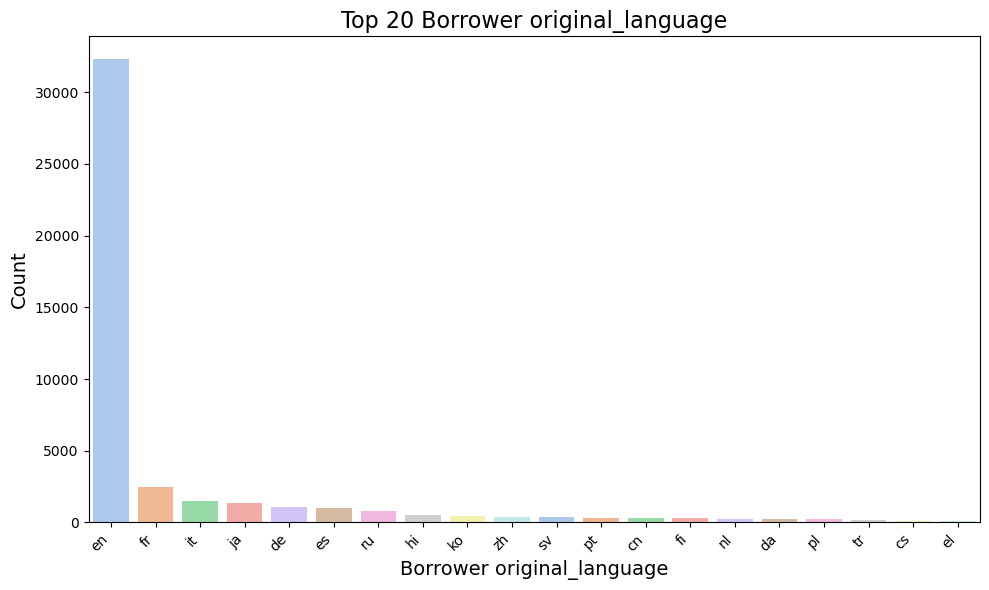

In [104]:
bar_plot('original_language')

    It seens that most of the movies are in English Contents 
        It may or may not so much important to us.

In [106]:
movies['original_title'].value_counts().head()

original_title
Alice in Wonderland     8
Hamlet                  8
A Christmas Carol       7
The Three Musketeers    7
Cinderella              7
Name: count, dtype: int64

In [108]:
movies[movies['original_title'] == 'Alice in Wonderland'].head()

,original_language,original_title,overview,popularity,poster_path,production_companies,release_date,runtime,spoken_languages,status,title,video,vote_average,vote_count,genre_1
1003,en,Alice in Wonderland,"On a golden afternoon, young Alice follows a W...",16.49,/9gJa2B6M8jt85aDkb0MF98MLZ9T.jpg,RKO Radio Pictures,1951-07-03,75.00,English,Released,Alice in Wonderland,False,7.00,80.50,Animation
9665,en,Alice in Wonderland,Alice follows a white rabbit down a rabbit-hol...,8.61,/c53p3QRI0BNx7KE1zH8fXoWq4sM.jpg,NBC,1999-02-28,140.00,English,Released,Alice in Wonderland,False,6.10,71.00,Fantasy
11887,en,Alice in Wonderland,Classic tale of a girl named Alice who follows...,3.79,/1jlw8lSaLetDP4XqioTgK6R38Lt.jpg,Irwin Allen Productions,1985-12-09,140.00,English,Released,Alice in Wonderland,False,6.30,15.00,Family
14892,en,Alice in Wonderland,"Alice, an unpretentious and individual 19-year...",17.29,/pvEE5EN5N1yjmHmldfL4aJWm56l.jpg,Walt Disney Pictures,2010-03-03,108.00,English,Released,Alice in Wonderland,False,6.40,80.50,Family
15868,en,Alice in Wonderland,"On a boring winter afternoon, Alice dreams, th...",1.50,/hA536GMozYb9zbMjo2NqESniveU.jpg,Paramount Pictures,1933-12-22,76.00,English,Released,Alice in Wonderland,False,5.40,8.00,Action


In [109]:
movies['overview']

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
45461          Rising and falling between a man and woman.
45462    An artist struggles to finish his work while a...
45463    When one of her hits goes wrong, a professiona...
45464    In a small town live two brothers, one a minis...
45465    50 years after decriminalisation of homosexual...
Name: overview, Length: 45463, dtype: object

    The overview column contains brief summaries of movies, highlighting key themes, characters, and plots, 
    with a total of 45,463 entries providing diverse cinematic insights.

In [112]:
# movies['popularity'] = movies['popularity'].astype(int)
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')
movies['popularity'].describe()

count   45462.00
mean        2.92
std         6.01
min         0.00
25%         0.39
50%         1.13
75%         3.68
max       547.49
Name: popularity, dtype: float64

<Axes: xlabel='popularity'>

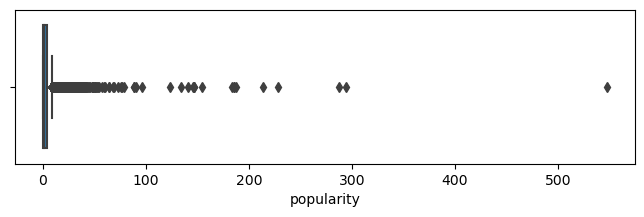

In [113]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = movies['popularity'])

In [114]:
outlier_remover(movies['popularity'])

0       8.62
1       8.62
2       8.62
3       3.86
4       8.39
        ... 
45461   0.07
45462   0.18
45463   0.90
45464   0.00
45465   0.16
Name: popularity, Length: 45463, dtype: float64

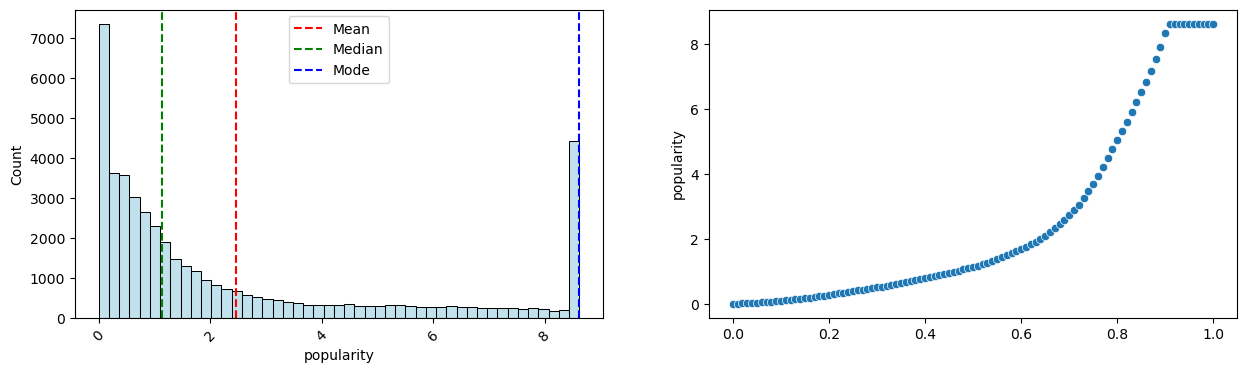

In [115]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movies, 'popularity')
plt.subplot(1, 2, 2)
sns.scatterplot(movies['popularity'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

In [116]:
movies['poster_path']

0        /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1        /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2        /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3        /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4        /e64sOI48hQXyru7naBFyssKFxVd.jpg
                       ...               
45461    /jldsYflnId4tTWPx8es3uzsB1I8.jpg
45462    /xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg
45463    /d5bX92nDsISNhu3ZT69uHwmfCGw.jpg
45464    /aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg
45465    /s5UkZt6NTsrS7ZF0Rh8nzupRlIU.jpg
Name: poster_path, Length: 45463, dtype: object

In [118]:
base_url = "https://image.tmdb.org/t/p/w500"

html_images = ""
for path in movies['poster_path']:
    full_url = f"{base_url}{path}"
    html_images += f'<img src="{full_url}" style="width: 200px; margin: 10px;">\n'

In [120]:
with open('posters.html', 'w') as f:
    f.write('<html><body>\n')
    f.write(html_images)
    f.write('</body></html>\n')

In [99]:
movies.columns

Index(['original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'release_date', 'runtime', 'spoken_languages', 'status', 'title', 'video', 'vote_average', 'vote_count', 'genre_1'], dtype='object')